# CAPSTONE MODUL 2
# Supermarket Customer Analysis
---
Kirana Azhura
JCDS 2602

## Latar Belakang

Supermarket merupakan bisnis ritel yang sangat kompetitif, dimana kepuasaan pelanggan dan strategi pemasaran yang efektif menjadi kunci kesuksesan. Dengan meningkatnya persaingan dan perubahan perilaku pelanggan, supermarket perlu memahami karakteristik pelanggan untuk meningkatkan penjualan, loyalitas, dan efisiensi operasional. Analisis perilaku pelanggan adalah salah satu cara bagi perusahaan untuk mendapatkan pemahaman lebih baik mengenai selera pasar dan menciptakan kesempatan bisnis baru. 

LRFM Analysis adalah teknik segmentasi pelanggan yang mirip dengan RFM (Recency, Frequency, Monetary), tetapi dengan penambahan dimensi baru, yaitu Length. LRFM adalah singkatan dari:

`L (Length):` Mengukur durasi atau panjang hubungan antara pelanggan dan perusahaan, biasanya dihitung sebagai selisih antara tanggal pembelian pertama dan terakhir. Indikator ini menunjukkan loyalitas atau kesetiaan jangka panjang pelanggan terhadap merek atau produk.

`R (Recency):` Mengukur seberapa baru atau terkini transaksi terakhir yang dilakukan oleh pelanggan. Semakin kecil nilainya, semakin baru transaksi tersebut, yang menunjukkan bahwa pelanggan masih aktif.

`F (Frequency):` Mengukur seberapa sering pelanggan melakukan transaksi dalam periode waktu tertentu. Pelanggan yang sering bertransaksi cenderung lebih loyal.

`M (Monetary):` Mengukur total nilai atau jumlah uang yang dihabiskan oleh pelanggan selama periode waktu tertentu. Semakin tinggi nilainya, semakin berharga pelanggan tersebut bagi perusahaan.

## Rumusan Masalah
Berdasarkan latar belakang yang telah diuraikan, analisis yang akan dilakukan sebagai berikut:
1. Bagaimana karakteristik segmentasi pelanggan supermarket dengan LRFM?
2. Bagaimana performa penjualan antar-segmen pelanggan, serta produk apa yang paling dominan pada masing-masing segmen?
3. Seberapa besar pengaruh pemberian diskon terhadap monetary dan frekuensi pelanggan?
4. Bagaimana distribusi jumlah pelanggan dan total penjualan melalui berbagai kanal (store, web, dan katalog)?
5. Bagaimana efektiVitas kampanye/promosi yang dilakukan?
6. Bagaimana distribusi komplain pelanggan?

## Data

### Import & Understanding Data

In [1]:
# import library
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#statistics
import statsmodels.api as sm
from scipy.stats import iqr 

import pylab as py 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',200)

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer

import datetime

In [2]:
# membaca/menampilkan data
df = pd.read_csv('Supermarket Customers.csv', sep='\t')

In [3]:
df.sample(10, random_state=42)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
324,2607,1953,Graduation,Single,40464.0,0,1,11-01-2013,78,424,17,118,7,23,41,6,8,2,8,8,0,0,0,0,0,0,3,11,0
96,7247,1960,Graduation,Widow,47916.0,0,1,22-11-2012,72,505,0,26,0,0,75,5,7,4,6,6,0,1,0,0,0,0,3,11,0
2104,5802,1972,Basic,Married,14188.0,0,0,28-02-2013,40,2,7,11,16,12,27,1,2,0,4,6,0,0,0,0,0,0,3,11,0
1259,2147,1969,Graduation,Together,76653.0,0,0,16-08-2013,91,736,63,946,219,189,126,1,4,7,11,2,0,0,1,1,0,0,3,11,0
1061,3759,1958,Graduation,Together,65196.0,0,2,25-07-2013,34,743,19,181,12,0,200,2,7,6,11,5,1,0,0,0,0,0,3,11,0
1805,9284,1958,Graduation,Together,53977.0,0,1,08-06-2013,21,620,16,165,0,24,82,5,5,5,12,5,0,0,0,0,0,0,3,11,0
916,10505,1960,Master,Together,73113.0,0,0,26-12-2013,86,741,19,154,50,9,28,1,3,4,7,2,0,0,0,0,0,0,3,11,0
350,2579,1957,Graduation,Married,71113.0,0,1,17-12-2013,95,495,33,255,11,33,8,4,6,7,9,4,0,0,0,0,0,0,3,11,0
1901,10779,1983,Graduation,Single,22148.0,0,0,13-04-2014,16,15,5,14,0,4,11,1,1,0,3,7,0,0,0,0,0,0,3,11,0
1650,8079,1982,Graduation,Married,22448.0,1,0,26-02-2014,86,3,1,8,23,2,18,3,2,1,3,3,0,0,0,0,0,0,3,11,0


#### Penjelasan Kolom

|Nama Kolom|Deskripsi|
|-----------|---------|
|ID|Pengenal unik pelanggan|
|Year_Birth|Tahun lahir pelanggan|
|Education|Tingkat pendidikan pelanggan|
|Marital_Status|Status pernikahan pelanggan|
|Income|Pendapatan rumah tangga tahunan pelanggan|
|Kidhome|Jumlah anak-anak dalam rumah tangga pelanggan|
|Teenhome|Jumlah remaja dalam rumah tangga pelanggan|
|Dt_Customer|Tanggal pendaftaran pelanggan sebagai member supermarket|
|Recency|Jumlah hari sejak pembelian terakhir pelanggan|
|MntWines|Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir|
|MntFruits|Jumlah yang dibelanjakan untuk buah dalam 2 tahun terakhir|
|MntMeatProducts|Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir|
|MntFishProducts|Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir|
|MntGoldProds|Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir|
|NumDealsPurchases|Jumlah pembelian yang dilakukan dengan diskon|
|AcceptedCmp1-5|1 Jika pelanggan menerima penawaran pada promosi 1-5, 0 jika tidak|
|Response|1 Jika pelanggan menerima penawaran pada promosi terakhir, 0 jika tidak|
|Complain|1 Jika pelanggan ada keluhan dalam 2 tahun terakhir, 0 jika tidak|


In [4]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Keterangan Edukasi:
- Basic: pendidikan dasar wajib
- 2n Cycle: pendidikan menengah atas atau setara (SMA / SMK)
- Graduation: Tingkat pendidikan pertama setelah sekolah menengah (S1)
- Master: S2
- PhD: Tingkat pendidikan tertinggi dalam hierarki akademik



In [5]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Keterangan Marital Status:
- Single: Belum menikah/tidak memiliki pasangan
- Together: Dalam hubungan tetapi belum resmi menikah
- Married: Sudah menikah secara resmi
- Divorced: Bercerai
- Widow: Pasangan sudah meninggal dunia
- Alone: Hidup sendiri
- Absurd: Kategori tidak lazim
- YOLO: You Onli Live Once

In [6]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [7]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.duplicated().sum()

0

Secara umum, kita bisa melihat bahwa:
- dataset Supermarket_Customer memiliki 29 kolom dan 2240 baris
- Terdapat 24 data NaN pada kolom `Income`
- Tidak ada data duplikat pada dataset


### Data Cleaning

In [10]:
df_clean = df.copy()

In [11]:
# drop kolom `Z_CostContact` dan `Z_Revenue`
df_clean = df_clean.drop(columns=['Z_CostContact', 'Z_Revenue'])

Dua kolom ini drop karena memiliki nilai yang sama untuk setiap barisnya, sehingga diasumsikan tidak akan dapat ditarik insight dari kolom ini.

In [12]:
# mengisi missing value kolom income dengan KNN imputer
np.sqrt(len(df_clean['Income'].values))

47.32863826479693

In [13]:
imputer = KNNImputer(n_neighbors=47, weights='distance')
knn_imputed_df = imputer.fit_transform(df_clean[['Income']])
df_clean['Income'] = pd.DataFrame(knn_imputed_df, columns=['Income'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
df_clean.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0


KNN Imputer menggunakan metode K-Nearest Neighbors (KNN) untuk mencari data yang mirip dengan data yang memiliki missing value, lalu menggunakan nilai tetangganya untuk mengisi kekosongan.
KNN Imputer dipilih karena diasumsikan kolom income memiliki keterkaitan dengan kolom lainnya seperti, kolom education. Sehingga KNN Imputer dipilih karena:
- Lebih Akurat: Tidak hanya sekadar mengganti dengan rata-rata, tetapi mempertimbangkan pola dari data lain.
- Menjaga Variasi Data: Tidak membuat semua missing value menjadi nilai yang sama.
- Memanfaatkan Informasi Kontekstual: Misalnya, orang dengan pendidikan tinggi dan usia lebih tua cenderung memiliki pendapatan lebih tinggi.

In [15]:
df_clean['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [16]:
# mengubah Marital_Status yang berisi 'Alone', 'Absurd', dan 'YOLO' menjadi 'Single' 
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace({
    'Alone' : 'Single',
    'Absurd' : 'Single',
    'YOLO' : 'Single'
})

In [17]:
df_clean['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

Hal ini dilakukan karena untuk status Alone, Absurd, dan Yolo diasumsikan sama-sama merujuk pada status 'tidak berpasangan'. Sehingga untuk memudahkan analisis nantinya lebih baik diubah dengan status Single yang lebih umum digunakan. 

In [18]:
# mengubah type data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [19]:
# dt_customer ke time
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d-%m-%Y')

Diasumsikan tanggal analisis diperoleh dari hari terakhir transaksi + 1 hari

In [20]:
tgl_analisis = df_clean['Dt_Customer'].max() + datetime.timedelta(1)
tgl_analisis

Timestamp('2014-06-30 00:00:00')

In [21]:
# membuat kolom baru Age
df_clean['Age'] = tgl_analisis.year - df_clean['Year_Birth']

### Feature Engineering

[Kategori usia menurut Kemenkes](https://ayosehat.kemkes.go.id/kategori-usia)

In [22]:
# membuat kolom baru Age_Status
rentang = [0, 5, 10, 18, 60, 200]
label = ['Bayi dan Balita', 'Anak-anak', 'Remaja', 'Dewasa', 'Lansia']

df_clean['Age_Status'] = pd.cut(
    df_clean['Age'],
    bins = rentang,
    labels = label,
    right = False
)

In [23]:
# Membuat Kolom baru child
df_clean['Child'] = df_clean['Kidhome'] + df_clean['Teenhome']

In [24]:
# Membuat kolom baru child_status
df_clean['Child_Status'] = df_clean['Child'].apply(lambda x: 'Yes' if x>0 else 'No')

In [25]:
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,Dewasa,0,No
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,Lansia,2,Yes
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,Dewasa,0,No
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,Dewasa,1,Yes
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,Dewasa,1,Yes


In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [27]:
# id ke object
df_clean['ID'] = df_clean['ID'].astype('str')

# Education, Marital_Status, Age_Status, dan Child_Status ke category
df_clean['Education'] = df_clean['Education'].astype('category')
df_clean['Marital_Status'] = df_clean['Marital_Status'].astype('category')
df_clean['Age_Status'] = df_clean['Age_Status'].astype('category')
df_clean['Child_Status'] = df_clean['Child_Status'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## 1. Segmentasi Karakteristik Pelanggan

## LRFM

Untuk melihat bagaimana karakteristik segmentasi pelanggan supermarket kita akan menggunakan LRFM

Adapun langkah-langkah dalam LRFM sebagai berikut:

### 1. Menghitung Nilai LRFM

#### `Length` 
> mengukur durasi hubungan antara pelanggan dan perusahaan

In [28]:
tgl_analisis

Timestamp('2014-06-30 00:00:00')

In [29]:
df_clean.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,Dewasa,0,No


In [30]:
# Menghitung length tiap pelanggan
df_length = df_clean.groupby('ID').agg(
    length=('Dt_Customer', lambda x: (tgl_analisis - x.min()).days),
)

df_length.sample(5, random_state=8)

,length
ID,
5564,690
5025,188
6222,245
4324,609
9635,71


Dari hasil tabel di atas, dapat dilihat bahwa pelanggan dengan ID 5564 sudah bergabung sejak 690 hari yang lalu sedangkan pelanggan dengan ID 9635 baru bergabung 71 hari yang lalu. 

#### `Recency`
> Melihat berapa lama waktu pelanggan dalam melakukan transaksi terakhirnya.

untuk kolom Recency akan digunakan kolom yang sudah ada pada data.

In [31]:
df_recency = df_clean.groupby('ID').agg(
    recency=('Recency', 'sum'),
)

df_recency.sample(5, random_state=8)

,recency
ID,
5564,26
5025,32
6222,28
4324,42
9635,13


Dari segi recency, pelanggan dengan ID 4324 terakhir berbelanja 42 hari yang lalu. Artinya pelanggan dengan ID 4324 sudah cukup lama tidak berbelanja pada Supermarket. Sedangkan pelanggan dengan ID 9635 baru 13 hari yang lalu melakukan transaksi terakhir, artinya pelanggan ini cukup baru dalam berbelanja di Supermarket.

#### `Frequency`
 > mengetahui seberapa sering pelanggan melakukan transaksi

Karena pada data tidak terdapat tanggal setiap pelanggan melakukan transaksi, akan digunakan `Total seluruh pembelian yang dilakukan pelanggan pada setiap channel` untuk frequency.

In [32]:
# membuat kolom frequency dengan menjumlahkan kolom NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases
df_clean['Frequency'] = df_clean['NumWebPurchases'] + df_clean['NumCatalogPurchases'] + df_clean['NumStorePurchases']

In [33]:
df_frequency = df_clean.groupby('ID').agg(
    frequency=('Frequency', 'sum'),
)

df_frequency.sample(5, random_state=8)

,frequency
ID,
5564,18
5025,7
6222,5
4324,16
9635,7


Dari hasil tabel di atas, dapat dilihat bahwa pelanggan dengan ID 4324 melakukan 21 kali transaksi sehingga dapat dikatakan frekuensinya tinggi. Sedangkan pelanggan dengan ID 6222 hanya 7 kali transaksi sehingga dapat dikatakan frekuensinya relatif rendah

#### `Monetary`
> mengukur seberapa besar pengularan pelanggan pelanggan dalam setiap transaksi

In [34]:
df_clean.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,Dewasa,0,No,22


In [35]:
df_clean['TotalPrice'] = df_clean['MntWines'] + df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + df_clean['MntSweetProducts'] + df_clean['MntGoldProds']
df_clean.sample(5, random_state=8)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice
1317,4937,1973,2n Cycle,Married,46094.0,1,1,2014-06-10,62,12,2,20,3,2,5,1,1,0,3,7,0,0,0,0,0,0,0,41,Dewasa,2,Yes,4,44
1175,1604,1960,Master,Married,47353.0,0,1,2013-11-13,93,184,2,19,8,8,4,3,2,2,6,5,0,0,0,0,0,0,0,54,Dewasa,1,Yes,10,225
1451,6652,1965,Graduation,Married,77343.0,0,0,2014-06-09,28,227,151,573,98,54,31,1,3,4,9,1,0,0,0,0,0,0,0,49,Dewasa,0,No,16,1134
1010,5236,1979,Graduation,Together,77568.0,0,1,2012-08-25,30,1230,0,396,232,178,158,1,10,2,8,5,0,1,1,1,0,0,0,35,Dewasa,1,Yes,20,2194
2158,5186,1955,PhD,Married,58482.0,0,1,2014-03-12,59,576,7,115,19,7,7,2,7,4,9,6,0,1,0,0,0,0,0,59,Dewasa,1,Yes,20,731


In [36]:
df_monetary = df_clean.groupby('ID').agg(
    monetary=('TotalPrice', 'sum'),
)

df_monetary.sample(5, random_state=8)

,monetary
ID,
5564,1338
5025,135
6222,37
4324,684
9635,129


Dari hasil tabel di atas, dapat dilihat bahwa pelanggan dengan ID 5564 memiliki nilai transaksi yang besar yaitu $1338, sedangkan pelanggan dengan ID 6222 memiliki nilai transaksi yang relatif kecil, yaitu $37.



Selanjutnya, semua informasi yang sudah diperoleh, yaitu length, recency, frequency, dan monetary, akan digabungkan dalam satu dataframe untuk memudahkan analisis segmentasi pelanggan.

In [37]:
df_pelanggan = df_clean.groupby('ID').agg(
    length=('Dt_Customer', lambda x: (tgl_analisis - x.min()).days),
    recency=('Recency', 'sum'),
    frequency=('Frequency', 'sum'), 
    monetary=('TotalPrice', 'sum')
)

df_pelanggan.sample(5, random_state=8)

,length,recency,frequency,monetary
ID,,,,
5564,690,26,18,1338
5025,188,32,7,135
6222,245,28,5,37
4324,609,42,16,684
9635,71,13,7,129


Berikut penjelasan dari masing-masing variabel diatas:

| Variable | Description |
| --- | --- |
| ID | Pengenal unik pelanggan |
| length | Usia pelanggan, diperoleh dari selisih hari pertama bertransaksi dengan hari analisis |
| recency | Selisih hari terakhir pelanggan bertransaksi |
| frequency | Jumlah transaksi yang dilakukan oleh pelanggan pada seluruh channel |
| monetary | Besar pengeluaran yang dilakukan oleh pelanggan untuk semua produk |

### 2. Menentukan Skor

Selanjutnya kita akan menentukan skor dengan metode Statistical Approach

#### **Segmentasi Length**

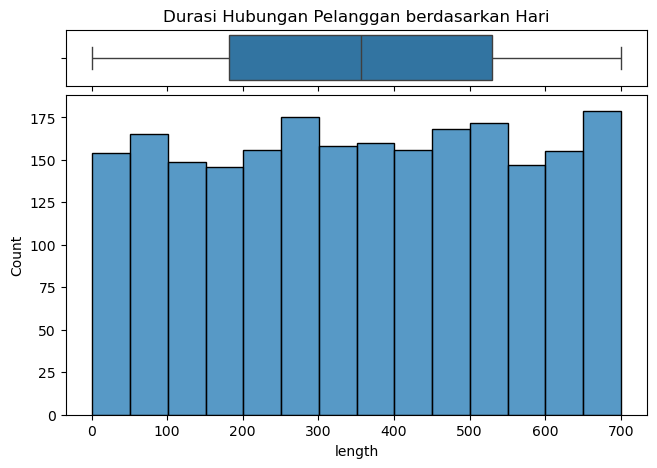

0.00      1.00
0.25    181.75
0.50    356.50
0.75    530.00
1.00    700.00
Name: length, dtype: float64

In [38]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_pelanggan, x='length', ax=ax_top)
sns.histplot(data=df_pelanggan, x='length', ax=ax_bot)

ax_top.set(
    title='Durasi Hubungan Pelanggan berdasarkan Hari'
)

plt.show()
display(df_pelanggan['length'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan pelanggan berdasarkan length-nya ke dalam 4 kelompok yaitu :
- 4 (Very Long-term Customers) : telah bergabung lebih dari 530 hari
- 3 (Long-term Customers) : telah bergabung antara 356 hingga 530 hari terakhir
- 2 (Medium-term Customers) : telah bergabung antara 181 hingga 356 hari terakhir
- 1 (Short-term Customers) : baru bergabung antara 1 hingga 181 hari terakhir

In [39]:
df_pelanggan['L_score'] = pd.qcut(
    df_pelanggan['length'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk length: semakin lama, maka semakin besar skornya
).astype(int)

df_pelanggan.sample(5, random_state=8)

,length,recency,frequency,monetary,L_score
ID,,,,,
5564,690,26,18,1338,4
5025,188,32,7,135,2
6222,245,28,5,37,2
4324,609,42,16,684,4
9635,71,13,7,129,1


#### **Segmentasi Recency**

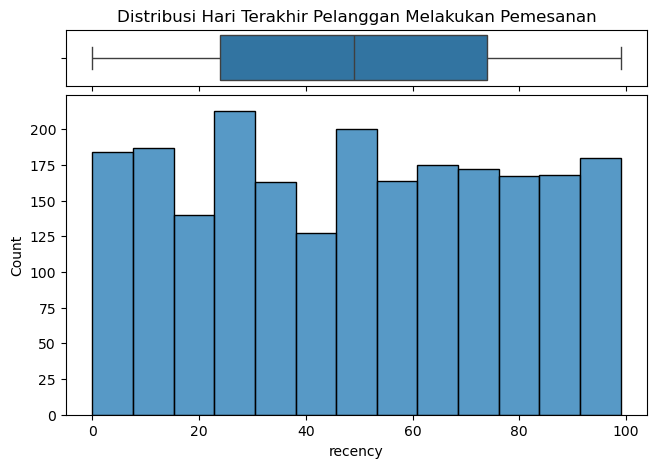

0.00     0.0
0.25    24.0
0.50    49.0
0.75    74.0
1.00    99.0
Name: recency, dtype: float64

In [40]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_pelanggan, x='recency', ax=ax_top)
sns.histplot(data=df_pelanggan, x='recency', ax=ax_bot)

ax_top.set(
    title='Distribusi Hari Terakhir Pelanggan Melakukan Pemesanan'
)

plt.show()
display(df_pelanggan['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan pelanggan berdasarkan recency-nya ke dalam 4 kelompok yaitu :
- 4 (Active) : melakukan transaksi kurang dari 24 hari terakhir
- 3 (Warm) : melakukan transaksi antara 24 hingga 49 hari terakhir
- 2 (Cold) : melakukan transaksi antara 49 hingga 74 hari terakhir
- 1 (Inactive) : melakukan transaksi lebih dari 74 hari terakhir

In [41]:
df_pelanggan['R_score'] = pd.qcut(
    df_pelanggan['recency'],             # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[4, 3, 2, 1]                 # pelabelan, untuk recency: semakin kecil, maka semakin besar skornya
).astype(int)

df_pelanggan.sample(5, random_state=8)

,length,recency,frequency,monetary,L_score,R_score
ID,,,,,,
5564,690,26,18,1338,4,3
5025,188,32,7,135,2,3
6222,245,28,5,37,2,3
4324,609,42,16,684,4,3
9635,71,13,7,129,1,4


#### **Segmentasi Frequency**

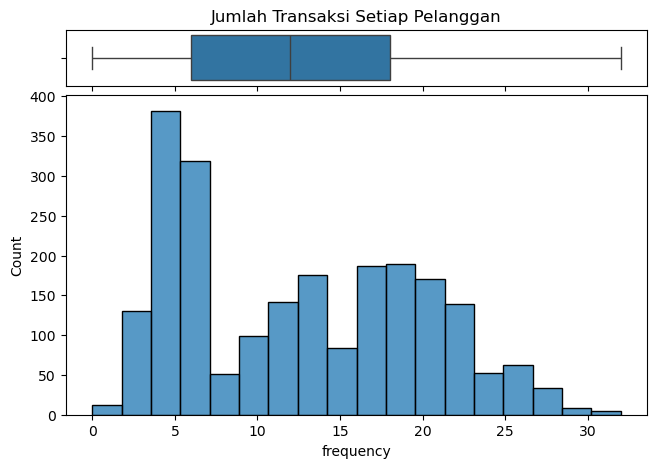

0.00     0.0
0.25     6.0
0.50    12.0
0.75    18.0
1.00    32.0
Name: frequency, dtype: float64

In [42]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_pelanggan, x='frequency', ax=ax_top)
sns.histplot(data=df_pelanggan, x='frequency', ax=ax_bot)

ax_top.set(
    title='Jumlah Transaksi Setiap Pelanggan'
)

plt.show()
display(df_pelanggan['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan pelanggan berdasarkan frequency-nya ke dalam 4 kelompok yaitu:
- 4 (Loyal) : melakukan transaki lebih dari 18 kali
- 3 (High) : melakukan transaksi 12 hingga 18 kali
- 2 (Medium) : melakukan transaksi 6 hingga 12 kali
- 1 (Low) : melakukan transaksi hanya kurang dari 6 kali.

In [43]:
df_pelanggan['F_score'] = pd.qcut(
    df_pelanggan['frequency'],             # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk frequency: semakin besar, maka semakin besar skornya
).astype(int)

df_pelanggan.sample(5, random_state=8)

,length,recency,frequency,monetary,L_score,R_score,F_score
ID,,,,,,,
5564,690,26,18,1338,4,3,3
5025,188,32,7,135,2,3,2
6222,245,28,5,37,2,3,1
4324,609,42,16,684,4,3,3
9635,71,13,7,129,1,4,2


#### **Segmentasi Monetary**

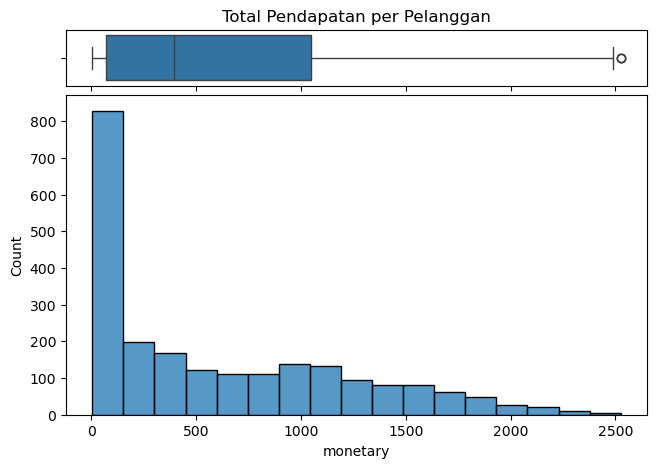

0.00       5.00
0.25      68.75
0.50     396.00
0.75    1045.50
1.00    2525.00
Name: monetary, dtype: float64

In [44]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_pelanggan, x='monetary', ax=ax_top)
sns.histplot(data=df_pelanggan, x='monetary', ax=ax_bot)

ax_top.set(
    title= 'Total Pendapatan per Pelanggan'
)

plt.show()
display(df_pelanggan['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan pelanggan berdasarkan monetary-nya ke dalam 4 kelompok yaitu:
- 4 (Top Spender) : melakukan transaksi lebih dari 1045 dollar
- 3 (High Spender) : melakukan transaksi antara 396 hingga 1045 dollar
- 2 (Medium Spender) : melakukan transaksi antara 68.75 hingga 396 dollar
- 1 (Low Spender) : melakukan transaksi kurang dari dari 68.75 dollar

In [45]:
df_pelanggan['M_score'] = pd.qcut(
    df_pelanggan['monetary'],            # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk monetary: semakin besar, maka semakin besar skornya
).astype(int)

df_pelanggan.sample(5, random_state=8)

,length,recency,frequency,monetary,L_score,R_score,F_score,M_score
ID,,,,,,,,
5564,690,26,18,1338,4,3,3,4
5025,188,32,7,135,2,3,2,2
6222,245,28,5,37,2,3,1,1
4324,609,42,16,684,4,3,3,3
9635,71,13,7,129,1,4,2,2


### 3. Penamaan Segmentasi
> akan dilakukan customer segmentation dengan cara Combining Individual Scores Approach.

Pada tahapan ini kita akan menggabungkan l_score, r_score, f_score, dan m_score menjadi lrfm_score_combined

In [46]:
df_pelanggan['lrfm_score'] = df_pelanggan['L_score'].astype(str) + df_pelanggan['R_score'].astype(str) + df_pelanggan['F_score'].astype(str) + df_pelanggan['M_score'].astype(str)
df_pelanggan.sample(5, random_state=8)

,length,recency,frequency,monetary,L_score,R_score,F_score,M_score,lrfm_score
ID,,,,,,,,,
5564,690,26,18,1338,4,3,3,4,4334
5025,188,32,7,135,2,3,2,2,2322
6222,245,28,5,37,2,3,1,1,2311
4324,609,42,16,684,4,3,3,3,4333
9635,71,13,7,129,1,4,2,2,1422


Lalu kita akan kelompokkan kedalam 8 segmen dengan ketentuan berikut:

In [47]:
seg_map = {
    # New Customers
    r'[1-2][1-4][1-4][1-2]': 'Explorers',
    r'[1-2][1-4][1-4][3-4]': 'High-Potential Newcomers',

    # Existing Customers
    r'[3-4][1-2][1-2][1-2]': 'Dormant Accounts',
    r'[3-4][1-2][3-4][3-4]': 'At-Risk High Spenders',
    r'[3-4][1-2][1-4][1-4]': 'Fading Loyalist', 

    # Core Customers
    r'[3-4][3-4][3-4][3-4]': 'Champions',
    r'[3-4][3-4][3-4][1-2]': 'Frequent Shoppers',

    # Reactivated
    r'[3-4][3-4][1-2][1-4]': 'Rebounding Customers'       
}
    
df_pelanggan['lrfm_segmentasi'] = df_pelanggan['lrfm_score'].replace(seg_map, regex=True)
df_pelanggan = df_pelanggan.reset_index()
df_pelanggan.sample(5, random_state=8)


,ID,length,recency,frequency,monetary,L_score,R_score,F_score,M_score,lrfm_score,lrfm_segmentasi
1317,5564,690,26,18,1338,4,3,3,4,4334,Champions
1175,5025,188,32,7,135,2,3,2,2,2322,Explorers
1451,6222,245,28,5,37,2,3,1,1,2311,Explorers
1010,4324,609,42,16,684,4,3,3,3,4333,Champions
2158,9635,71,13,7,129,1,4,2,2,1422,Explorers


In [48]:
df_pelanggan.to_csv('Pelanggan_segmentasi.csv', index=False)

In [49]:
df_pelanggan

,ID,length,recency,frequency,monetary,L_score,R_score,F_score,M_score,lrfm_score,lrfm_segmentasi
0,0,422,66,16,1198,3,2,3,4,3234,At-Risk High Spenders
1,1,15,0,17,577,1,4,3,3,1433,High-Potential Newcomers
2,1000,479,48,23,964,3,3,4,3,3343,Champions
3,10001,698,98,6,100,4,1,1,2,4112,Dormant Accounts
4,10010,662,43,7,152,4,3,2,2,4322,Rebounding Customers
...,...,...,...,...,...,...,...,...,...,...,...
2235,9984,460,25,17,724,3,3,3,3,3333,Champions
2236,9986,128,8,7,54,1,4,2,1,1421,Explorers
2237,9988,484,84,22,860,3,1,4,3,3143,At-Risk High Spenders
2238,999,544,95,24,730,4,1,4,3,4143,At-Risk High Spenders


### 4. Karakteristik Pelanggan antar-Segmentasi

Penjelasan Segmentasi

1. `Explorers`: Pelanggan baru dengan nilai belanja rendah.
Contoh: Mahasiswa baru yang mencoba belanja kebutuhan harian
2. `High-Potential Newcomers`: Pelanggan baru dengan nilai transaksi tinggi.
Contoh: Keluarga muda pindahan kompleks perumahan baru
3. `Dormant Accounts`: Pelanggan lama yang sudah tidak aktif
Contoh: Ibu rumah tangga yang beralih ke pasar tradisional
4. `Fading Loyalist`: Pelanggan setia dengan frekuensi menurun.
Contoh: Lansia yang mulai mengurangi frekuensi belanja
5. `At-Risk High Spenders`: Pelanggan bernilai tinggi yang mulai jarang belanja.
Contoh: Eksekutif muda yang mulai belanja di supermarket premium
6. `Champions`: Pelanggan ideal (loyal, sering, besar nilai belanja).
Contoh: Pemilik rumah makan yang rutin belanja grosir
7. `Frequent Shoppers`: Sering belanja tapi nilai transaksi kecil.
Contoh: Mahasiswa yang belanja harian
8. `Rebounding Customers`: Pelanggan lama yang kembali aktif.
Contoh: Pelanggan yang kembali setelah mencoba kompetitor

Kita akan coba tampilkan karakteristik dari setiap segment dalam bentuk visualisasi sebagai berikut:

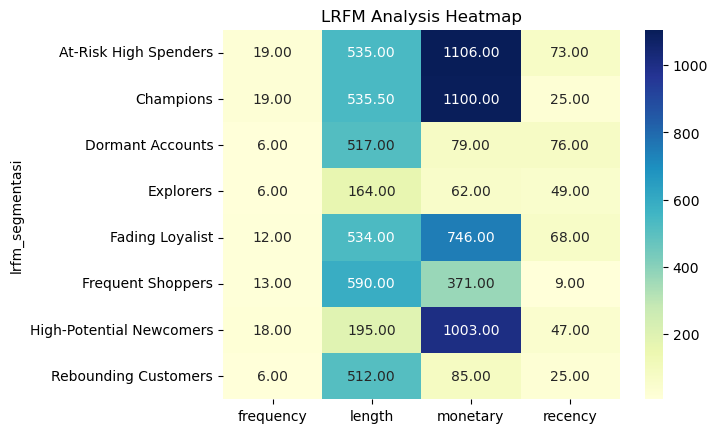

In [50]:
lrfm_heatmap = df_pelanggan.pivot_table(index='lrfm_segmentasi', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

Menggabungkan lrfm_pelanggan pada df_pelanggan ke dalam df_clean untuk analisis selanjutnya.

In [51]:
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,Dewasa,0,No,22,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,Lansia,2,Yes,4,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,Dewasa,0,No,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,Dewasa,1,Yes,6,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,Dewasa,1,Yes,14,422


In [52]:
df_pelanggan.reset_index(inplace=True)
df_pelanggan

,index,ID,length,recency,frequency,monetary,L_score,R_score,F_score,M_score,lrfm_score,lrfm_segmentasi
0,0,0,422,66,16,1198,3,2,3,4,3234,At-Risk High Spenders
1,1,1,15,0,17,577,1,4,3,3,1433,High-Potential Newcomers
2,2,1000,479,48,23,964,3,3,4,3,3343,Champions
3,3,10001,698,98,6,100,4,1,1,2,4112,Dormant Accounts
4,4,10010,662,43,7,152,4,3,2,2,4322,Rebounding Customers
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,9984,460,25,17,724,3,3,3,3,3333,Champions
2236,2236,9986,128,8,7,54,1,4,2,1,1421,Explorers
2237,2237,9988,484,84,22,860,3,1,4,3,3143,At-Risk High Spenders
2238,2238,999,544,95,24,730,4,1,4,3,4143,At-Risk High Spenders


In [53]:
df_clean = df_clean.merge(
    df_pelanggan[['ID', 'length', 'frequency', 'monetary', 'lrfm_segmentasi']],  # Hanya ambil kolom 'lrfm_segmentasi'
    on='ID',
    how='left'
)

In [54]:
df_clean.sample(5, random_state=8)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
1317,4937,1973,2n Cycle,Married,46094.0,1,1,2014-06-10,62,12,2,20,3,2,5,1,1,0,3,7,0,0,0,0,0,0,0,41,Dewasa,2,Yes,4,44,20,4,44,Explorers
1175,1604,1960,Master,Married,47353.0,0,1,2013-11-13,93,184,2,19,8,8,4,3,2,2,6,5,0,0,0,0,0,0,0,54,Dewasa,1,Yes,10,225,229,10,225,Explorers
1451,6652,1965,Graduation,Married,77343.0,0,0,2014-06-09,28,227,151,573,98,54,31,1,3,4,9,1,0,0,0,0,0,0,0,49,Dewasa,0,No,16,1134,21,16,1134,High-Potential Newcomers
1010,5236,1979,Graduation,Together,77568.0,0,1,2012-08-25,30,1230,0,396,232,178,158,1,10,2,8,5,0,1,1,1,0,0,0,35,Dewasa,1,Yes,20,2194,674,20,2194,Champions
2158,5186,1955,PhD,Married,58482.0,0,1,2014-03-12,59,576,7,115,19,7,7,2,7,4,9,6,0,1,0,0,0,0,0,59,Dewasa,1,Yes,20,731,110,20,731,High-Potential Newcomers


### Jumlah pelanggan per segmentasi

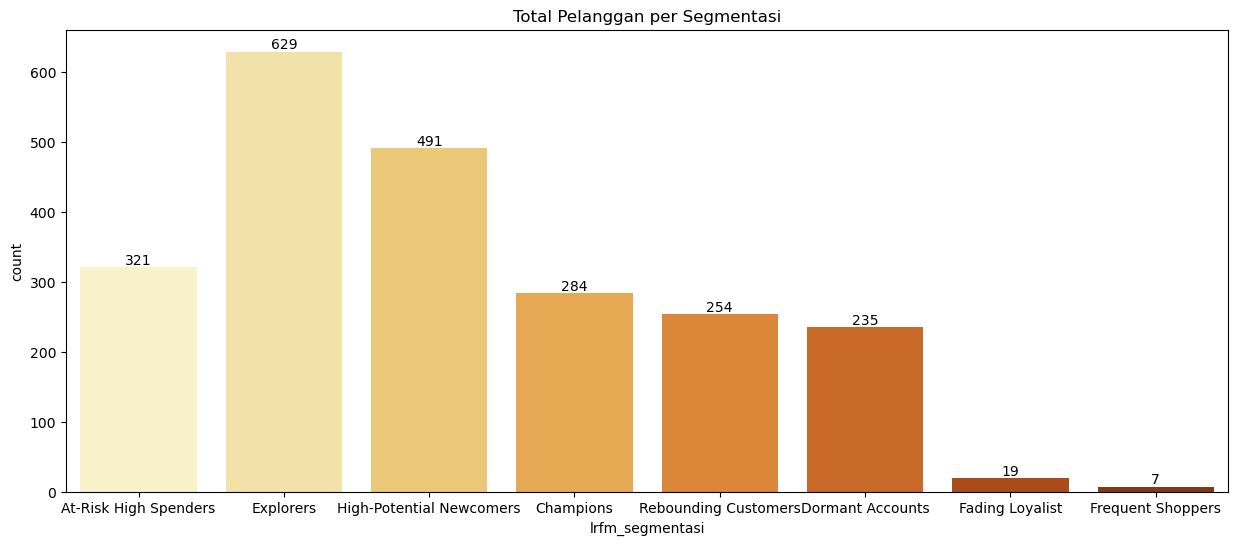

In [55]:
plt.figure(figsize=(15,6))
fig1 = sns.countplot(x = 'lrfm_segmentasi', data = df_clean, palette='YlOrBr')
plt.title('Total Pelanggan per Segmentasi')
for container in fig1.containers:
    fig1.bar_label(container)

Dari barplot tersebut dapat dilihat bahwa pelanggan terbanyak dari Supermarket adalah `Explorers` dengan jumlah 629 orang. Sedangkan untuk segmentasi pelanggan dengan jumlah pelanggan terendah adalah `Frequent Shoppers` yang hanya berjumlah 7 orang.

Profil Demografis Pelanggan

In [56]:
# Jumlah pelanggan per segmentasi berdasarkan edukasi
edu_segcus= df_clean.pivot_table(
    index=['lrfm_segmentasi'],
    columns=['Education'],
    values='ID',
    aggfunc='count',
    fill_value=0
)
edu_segcus

Education,2n Cycle,Basic,Graduation,Master,PhD
lrfm_segmentasi,,,,,
At-Risk High Spenders,26,1,159,49,86
Champions,23,0,145,47,69
Dormant Accounts,24,15,134,34,28
Explorers,69,18,294,114,134
Fading Loyalist,1,1,11,4,2
Frequent Shoppers,0,0,5,2,0
High-Potential Newcomers,36,0,254,80,121
Rebounding Customers,24,19,125,40,46


In [57]:
# Jumlah pelanggan per segmentasi berdasarkan Marital_Status
marital_segcus= df_clean.pivot_table(
    index=['lrfm_segmentasi'],
    columns=['Marital_Status'],
    values='ID',
    aggfunc='count',
    fill_value=0
)
marital_segcus

Marital_Status,Divorced,Married,Single,Together,Widow
lrfm_segmentasi,,,,,
At-Risk High Spenders,40,128,63,76,14
Champions,32,106,66,67,13
Dormant Accounts,25,84,61,61,4
Explorers,68,248,142,154,17
Fading Loyalist,3,6,3,7,0
Frequent Shoppers,2,2,2,1,0
High-Potential Newcomers,43,190,99,138,21
Rebounding Customers,19,100,51,76,8


In [58]:
# Jumlah pelanggan per segmentasi Age_Status
age_segcus= df_clean.pivot_table(
    index=['lrfm_segmentasi'],
    columns=['Age_Status'],
    values='ID',
    aggfunc='count',
    fill_value=0
)
age_segcus

Age_Status,Bayi dan Balita,Anak-anak,Remaja,Dewasa,Lansia
lrfm_segmentasi,,,,,
At-Risk High Spenders,0,0,0,258,63
Champions,0,0,0,243,41
Dormant Accounts,0,0,0,210,25
Explorers,0,0,0,559,70
Fading Loyalist,0,0,0,16,3
Frequent Shoppers,0,0,0,7,0
High-Potential Newcomers,0,0,0,396,95
Rebounding Customers,0,0,0,232,22


In [59]:
# Jumlah pelanggan per segmentasi Child_Status
child_segcus= df_clean.pivot_table(
    index=['lrfm_segmentasi'],
    columns=['Child_Status'],
    values='ID',
    aggfunc='count',
    fill_value=0
)
child_segcus

Child_Status,No,Yes
lrfm_segmentasi,,
At-Risk High Spenders,130,191
Champions,114,170
Dormant Accounts,33,202
Explorers,65,564
Fading Loyalist,9,10
Frequent Shoppers,0,7
High-Potential Newcomers,251,240
Rebounding Customers,36,218


Mayoritas pelanggan dari semua segmentasi merupakan pelanggan dewasa yang berusia 18-60 tahun dan berpendidikan tinggi (Graduation dan PhD mendominasi hampir semua segmentasi)

1. `Explorers`: Pelanggan baru dengan nilai belanja rendah. Merupakan segmentasi yang memiliki jumlah pelanggan tertinggi yaitu 629 orang. Segmen ini didominasi oleh pelanggan yang sudah menikah atau sudah berpasangan, serta sudah memiliki anak.

2. `High-Potential Newcomers`: Pelanggan baru dengan nilai transaksi tinggi. Segmentasi ini memiliki jumlah pelanggan 491 orang. Segmen ini didominasi oleh pelanggan yang sudah menikah atau sudah berpasangan dengan persentase status anak hampir seimbang.

3. `Dormant Accounts`: Pelanggan lama yang sudah tidak aktif berjumlah 235 orang. Pelanggan yang dominan adalah pelanggan menikah (84 orang) dan single (61 orang), serta didominasi oleh pelanggan yang sudah memiliki anak.

4. `Fading Loyalist`: Pelanggan setia dengan frekuensi menurun berjumlah 19 orang. Didominasi oleh pelanggan yang sudah menikah atau sudah berpasangan, serta memiliki anak.

5. `At-Risk High Spenders`: Pelanggan bernilai tinggi yang mulai jarang belanja berjumlah 321 orang. Mayoritas sudah menikah atau sudah berpasangan serta sudah memiliki anak.

6. `Champions`: Pelanggan ideal (loyal, sering, besar nilai belanja) berjumlah 284 orang. Mayoritas sudah menikah atau sudah berpasangan, sekitar 60% sudah memiliki anak.

7. `Frequent Shoppers`: Sering belanja tapi nilai transaksi kecil. Merupakan segmentasi dengan jumlah pelanggan terkecil yaitu hanya 7 orang. Didominasi oleh pelanggan yang menikah dan bercerai, serta semuanya sudah memiliki anak.

8. `Rebounding Customers`: Pelanggan lama yang kembali aktif berjumlah 254 orang. Didominasi oleh pelanggan yang sudah menikah atau sudah berpasangan, dan sudah memiliki anak.

In [60]:
# df_clean.to_csv('Supermarket_clean_lrfm.csv')

## 2. Performa penjualan antar-segmen pelanggan

### Segmentasi Explorers
> Pelanggan baru dengan nilai belanja rendah

In [61]:
explorers = df_clean[df_clean['lrfm_segmentasi'] == 'Explorers']
explorers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,Lansia,2,Yes,4,27,114,4,27,Explorers
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,Dewasa,1,Yes,6,53,140,6,53,Explorers
9,5899,1950,PhD,Together,5648.000000,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,64,Lansia,2,Yes,1,49,109,1,49,Explorers
10,1994,1983,Graduation,Married,52247.251354,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,31,Dewasa,1,Yes,3,19,227,3,19,Explorers
13,8180,1952,Master,Divorced,59354.000000,1,1,2013-11-15,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,0,62,Lansia,2,Yes,12,310,227,12,310,Explorers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,6168,1963,Graduation,Divorced,45146.000000,1,1,2013-07-15,28,33,0,5,0,0,15,2,1,1,2,4,0,0,0,0,0,0,0,51,Dewasa,2,Yes,4,53,350,4,53,Explorers
2212,6983,1950,Master,Divorced,38054.000000,1,1,2014-05-01,24,23,2,17,2,1,0,2,2,0,3,7,0,0,0,0,0,0,0,64,Lansia,2,Yes,5,45,60,5,45,Explorers
2214,9303,1976,Graduation,Married,5305.000000,0,1,2013-07-30,12,12,4,7,1,3,5,0,1,0,0,13,0,0,0,0,0,0,0,38,Dewasa,1,Yes,1,32,335,1,32,Explorers
2223,1448,1963,Master,Married,33562.000000,1,2,2014-06-25,33,21,12,12,0,3,3,3,2,0,4,4,0,0,0,0,0,0,0,51,Dewasa,3,Yes,6,51,5,6,51,Explorers


In [62]:
# List product yang tersedia
product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Hitung rata-rata pembelian per produk
explorers_avg = explorers[product].mean().round(1).reset_index()
explorers_avg.columns = ['Product', 'Average_Purchase']
explorers_avg = explorers_avg.sort_values('Average_Purchase', ascending=False)
explorers_avg

,Product,Average_Purchase
0,MntWines,49.5
2,MntMeatProducts,23.0
5,MntGoldProds,13.8
3,MntFishProducts,6.3
4,MntSweetProducts,5.1
1,MntFruits,4.6


In [63]:
explorers_avg.to_csv('rata-rata explorers.csv')

In [64]:
# Hitung Total pembelian per produk
explorers_total = explorers[product].sum().reset_index()
explorers_total.columns = ['Product', 'Total_Purchase']
explorers_total = explorers_total.sort_values('Total_Purchase', ascending=False)
explorers_total

,Product,Total_Purchase
0,MntWines,31115
2,MntMeatProducts,14438
5,MntGoldProds,8662
3,MntFishProducts,3944
4,MntSweetProducts,3225
1,MntFruits,2872


In [65]:
df_clean.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,Dewasa,0,No,22,1617,664,22,1617,At-Risk High Spenders


In [66]:
# Hitung jumlah customer yang membeli (nilai > 0)
pur_counts_explorers = (explorers[product] > 0).sum().reset_index()
pur_counts_explorers.columns = ['Product', 'Total_Customers']
pur_counts_explorers = pur_counts_explorers.sort_values('Total_Customers', ascending=False)
pur_counts_explorers

,Product,Total_Customers
2,MntMeatProducts,628
0,MntWines,620
5,MntGoldProds,598
3,MntFishProducts,454
4,MntSweetProducts,454
1,MntFruits,446


### Segmentasi High-Potential Newcomers
> Pelanggan baru dengan nilai transaksi tinggi.

In [67]:
hp = df_clean[df_clean['lrfm_segmentasi'] == 'High-Potential Newcomers']
hp.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,Dewasa,0,No,20,776,313,20,776,High-Potential Newcomers


In [68]:
# Hitung rata-rata pembelian per produk
hp_avg = hp[product].mean().round(1).reset_index()
hp_avg.columns = ['Product', 'Average_Purchase']
hp_avg = hp_avg.sort_values('Average_Purchase', ascending=False)
hp_avg

,Product,Average_Purchase
0,MntWines,522.7
2,MntMeatProducts,306.8
3,MntFishProducts,68.3
5,MntGoldProds,65.8
4,MntSweetProducts,48.9
1,MntFruits,48.8


In [69]:
# Hitung Total pembelian per produk
hp_total = hp[product].sum().reset_index()
hp_total.columns = ['Product', 'Total_Purchase']
hp_total = hp_total.sort_values('Total_Purchase', ascending=False)
hp_total

,Product,Total_Purchase
0,MntWines,256637
2,MntMeatProducts,150636
3,MntFishProducts,33550
5,MntGoldProds,32312
4,MntSweetProducts,24021
1,MntFruits,23983


In [70]:
# Hitung jumlah customer yang membeli (nilai > 0)
pur_counts_hp = (hp[product] > 0).sum().reset_index()
pur_counts_hp.columns = ['Product', 'Total_Customers']
pur_counts_hp = pur_counts_hp.sort_values('Total_Customers', ascending=False)
pur_counts_hp

,Product,Total_Customers
0,MntWines,491
2,MntMeatProducts,491
5,MntGoldProds,474
3,MntFishProducts,442
1,MntFruits,438
4,MntSweetProducts,437


### Segmentasi At-Risk High Spenders
> Pelanggan bernilai tinggi yang mulai jarang belanja

In [71]:
rh = df_clean[df_clean['lrfm_segmentasi'] == 'At-Risk High Spenders']
rh.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,Dewasa,0,No,22,1617,664,22,1617,At-Risk High Spenders


In [72]:
# Hitung rata-rata pembelian per produk
rh_avg = rh[product].mean().round(1).reset_index()
rh_avg.columns = ['Product', 'Average_Purchase']
rh_avg = rh_avg.sort_values('Average_Purchase', ascending=False)
rh_avg

,Product,Average_Purchase
0,MntWines,601.9
2,MntMeatProducts,306.2
5,MntGoldProds,76.3
3,MntFishProducts,68.1
4,MntSweetProducts,49.2
1,MntFruits,45.6


In [73]:
# Hitung Total pembelian per produk
rh_total = rh[product].sum().reset_index()
rh_total.columns = ['Product', 'Total_Purchase']
rh_total = rh_total.sort_values('Total_Purchase', ascending=False)
rh_total

,Product,Total_Purchase
0,MntWines,193219
2,MntMeatProducts,98306
5,MntGoldProds,24494
3,MntFishProducts,21855
4,MntSweetProducts,15797
1,MntFruits,14651


In [74]:
# Hitung jumlah customer yang membeli (nilai > 0)
pur_counts_rh= (rh[product] > 0).sum().reset_index()
pur_counts_rh.columns = ['Product', 'Total_Customers']
pur_counts_rh = pur_counts_rh.sort_values('Total_Customers', ascending=False)
pur_counts_rh

,Product,Total_Customers
0,MntWines,321
2,MntMeatProducts,321
5,MntGoldProds,319
3,MntFishProducts,289
1,MntFruits,284
4,MntSweetProducts,276


### Segmentasi Champions
> Pelanggan ideal (loyal, sering, besar nilai belanja).

In [75]:
champions = df_clean[df_clean['lrfm_segmentasi'] == 'Champions']
champions.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,43,Dewasa,1,Yes,17,590,594,17,590,Champions


In [76]:
# Hitung rata-rata pembelian per produk
champions_avg = champions[product].mean().round(1).reset_index()
champions_avg.columns = ['Product', 'Average_Purchase']
champions_avg = champions_avg.sort_values('Average_Purchase', ascending=False)
champions_avg

,Product,Average_Purchase
0,MntWines,576.4
2,MntMeatProducts,312.9
5,MntGoldProds,75.1
3,MntFishProducts,65.2
4,MntSweetProducts,46.9
1,MntFruits,46.4


In [77]:
# Hitung Total pembelian per produk
champions_total = champions[product].sum().reset_index()
champions_total.columns = ['Product', 'Total_Purchase']
champions_total = champions_total.sort_values('Total_Purchase', ascending=False)
champions_total

,Product,Total_Purchase
0,MntWines,163702
2,MntMeatProducts,88859
5,MntGoldProds,21338
3,MntFishProducts,18530
4,MntSweetProducts,13324
1,MntFruits,13184


In [78]:
# Hitung jumlah customer yang membeli (nilai > 0)
pur_counts_champions = (champions[product] > 0).sum().reset_index()
pur_counts_champions.columns = ['Product', 'Total_Customers']
pur_counts_champions = pur_counts_champions.sort_values('Total_Customers', ascending=False)
pur_counts_champions

,Product,Total_Customers
0,MntWines,284
2,MntMeatProducts,284
5,MntGoldProds,282
3,MntFishProducts,256
1,MntFruits,250
4,MntSweetProducts,248


### Segmentasi Rebounding Customers
> Pelanggan lama yang kembali aktif.

In [79]:
rb = df_clean[df_clean['lrfm_segmentasi'] == 'Rebounding Customers']
rb.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,29,Dewasa,1,Yes,8,169,418,8,169,Rebounding Customers


In [80]:
# Hitung rata-rata pembelian per produk
rb_avg = rb[product].mean().round(1).reset_index()
rb_avg.columns = ['Product', 'Average_Purchase']
rb_avg = rb_avg.sort_values('Average_Purchase', ascending=False)
rb_avg

,Product,Average_Purchase
0,MntWines,62.5
2,MntMeatProducts,33.8
5,MntGoldProds,22.2
3,MntFishProducts,12.9
1,MntFruits,7.3
4,MntSweetProducts,7.2


In [81]:
# Hitung Total pembelian per produk
rb_total = rb[product].sum().reset_index()
rb_total.columns = ['Product', 'Total_Purchase']
rb_total = rb_total.sort_values('Total_Purchase', ascending=False)
rb_total

,Product,Total_Purchase
0,MntWines,15883
2,MntMeatProducts,8574
5,MntGoldProds,5639
3,MntFishProducts,3277
1,MntFruits,1862
4,MntSweetProducts,1827


In [82]:
# Hitung jumlah customer yang membeli (nilai > 0)
pur_counts_rb= (rb[product] > 0).sum().reset_index()
pur_counts_rb.columns = ['Product', 'Total_Customers']
pur_counts_rb = pur_counts_rb.sort_values('Total_Customers', ascending=False)
pur_counts_rb

,Product,Total_Customers
2,MntMeatProducts,254
0,MntWines,252
5,MntGoldProds,248
3,MntFishProducts,204
4,MntSweetProducts,204
1,MntFruits,202


### Segmentasi Dormant Accounts
> Pelanggan lama yang sudah tidak aktif

In [83]:
da = df_clean[df_clean['lrfm_segmentasi'] == 'Dormant Accounts']
da.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0,38,Dewasa,0,No,5,61,594,5,61,Dormant Accounts


In [84]:
# Hitung rata-rata pembelian per produk
da_avg = da[product].mean().round(1).reset_index()
da_avg.columns = ['Product', 'Average_Purchase']
da_avg = da_avg.sort_values('Average_Purchase', ascending=False)
da_avg

,Product,Average_Purchase
0,MntWines,48.4
2,MntMeatProducts,28.9
5,MntGoldProds,18.6
3,MntFishProducts,7.9
1,MntFruits,6.3
4,MntSweetProducts,6.0


In [85]:
# Hitung Total pembelian per produk
da_total = da[product].sum().reset_index()
da_total.columns = ['Product', 'Total_Purchase']
da_total = da_total.sort_values('Total_Purchase', ascending=False)
da_total

,Product,Total_Purchase
0,MntWines,11380
2,MntMeatProducts,6781
5,MntGoldProds,4376
3,MntFishProducts,1856
1,MntFruits,1472
4,MntSweetProducts,1411


In [86]:
# Hitung jumlah customer yang membeli (nilai > 0)
pur_counts_da= (da[product] > 0).sum().reset_index()
pur_counts_da.columns = ['Product', 'Total_Customers']
pur_counts_da = pur_counts_da.sort_values('Total_Customers', ascending=False)
pur_counts_da

,Product,Total_Customers
2,MntMeatProducts,235
0,MntWines,233
5,MntGoldProds,232
1,MntFruits,196
3,MntFishProducts,187
4,MntSweetProducts,178


### Segmentasi Fading Loyalist
> Pelanggan setia dengan frekuensi menurun.

In [87]:
fl = df_clean[df_clean['lrfm_segmentasi'] == 'Fading Loyalist']
fl.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
69,1357,1970,Graduation,Together,74854.0,1,2,2013-04-08,90,856,59,487,58,29,73,7,2,5,5,5,0,0,0,0,0,0,0,44,Dewasa,3,Yes,12,1562,448,12,1562,Fading Loyalist


In [88]:
# Hitung rata-rata pembelian per produk
fl_avg = fl[product].mean().round(1).reset_index()
fl_avg.columns = ['Product', 'Average_Purchase']
fl_avg = fl_avg.sort_values('Average_Purchase', ascending=False)
fl_avg

,Product,Average_Purchase
0,MntWines,384.1
2,MntMeatProducts,307.9
5,MntGoldProds,85.2
3,MntFishProducts,49.7
4,MntSweetProducts,49.1
1,MntFruits,38.4


In [89]:
# Hitung Total pembelian per produk
fl_total = fl[product].sum().reset_index()
fl_total.columns = ['Product', 'Total_Purchase']
fl_total = rh_total.sort_values('Total_Purchase', ascending=False)
fl_total

,Product,Total_Purchase
0,MntWines,193219
2,MntMeatProducts,98306
5,MntGoldProds,24494
3,MntFishProducts,21855
4,MntSweetProducts,15797
1,MntFruits,14651


In [90]:
# Hitung jumlah customer yang membeli (nilai > 0)
pur_counts_fl= (fl[product] > 0).sum().reset_index()
pur_counts_fl.columns = ['Product', 'Total_Customers']
pur_counts_fl = pur_counts_fl.sort_values('Total_Customers', ascending=False)
pur_counts_fl

,Product,Total_Customers
0,MntWines,19
2,MntMeatProducts,19
5,MntGoldProds,19
1,MntFruits,18
3,MntFishProducts,18
4,MntSweetProducts,18


### Segmentasi Frequent Shoppers
> Sering belanja tapi nilai transaksi kecil.

In [91]:
fs = df_clean[df_clean['lrfm_segmentasi'] == 'Frequent Shoppers']
fs.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
637,944,1962,Graduation,Married,56181.0,0,1,2013-01-08,6,121,103,69,8,44,48,1,4,2,7,4,0,0,0,0,0,0,0,52,Dewasa,1,Yes,13,393,538,13,393,Frequent Shoppers


In [92]:
# Hitung rata-rata pembelian per produk
fs_avg = fs[product].mean().round(1).reset_index()
fs_avg.columns = ['Product', 'Average_Purchase']
fs_avg = fs_avg.sort_values('Average_Purchase', ascending=False)
fs_avg

,Product,Average_Purchase
0,MntWines,226.1
2,MntMeatProducts,74.7
5,MntGoldProds,24.1
1,MntFruits,23.4
3,MntFishProducts,14.4
4,MntSweetProducts,11.9


In [93]:
# Hitung Total pembelian per produk
fs_total = fs[product].sum().reset_index()
fs_total.columns = ['Product', 'Total_Purchase']
fs_total = fs_total.sort_values('Total_Purchase', ascending=False)
fs_total

,Product,Total_Purchase
0,MntWines,1583
2,MntMeatProducts,523
5,MntGoldProds,169
1,MntFruits,164
3,MntFishProducts,101
4,MntSweetProducts,83


In [94]:
# Hitung jumlah customer yang membeli (nilai > 0)
pur_counts_fs= (fs[product] > 0).sum().reset_index()
pur_counts_fs.columns = ['Product', 'Total_Customers']
pur_counts_fs = pur_counts_fs.sort_values('Total_Customers', ascending=False)
pur_counts_fs

,Product,Total_Customers
0,MntWines,7
2,MntMeatProducts,7
5,MntGoldProds,7
1,MntFruits,6
3,MntFishProducts,6
4,MntSweetProducts,6


### Visualisasi Performa

#### Rata-rata Pembelian Produk

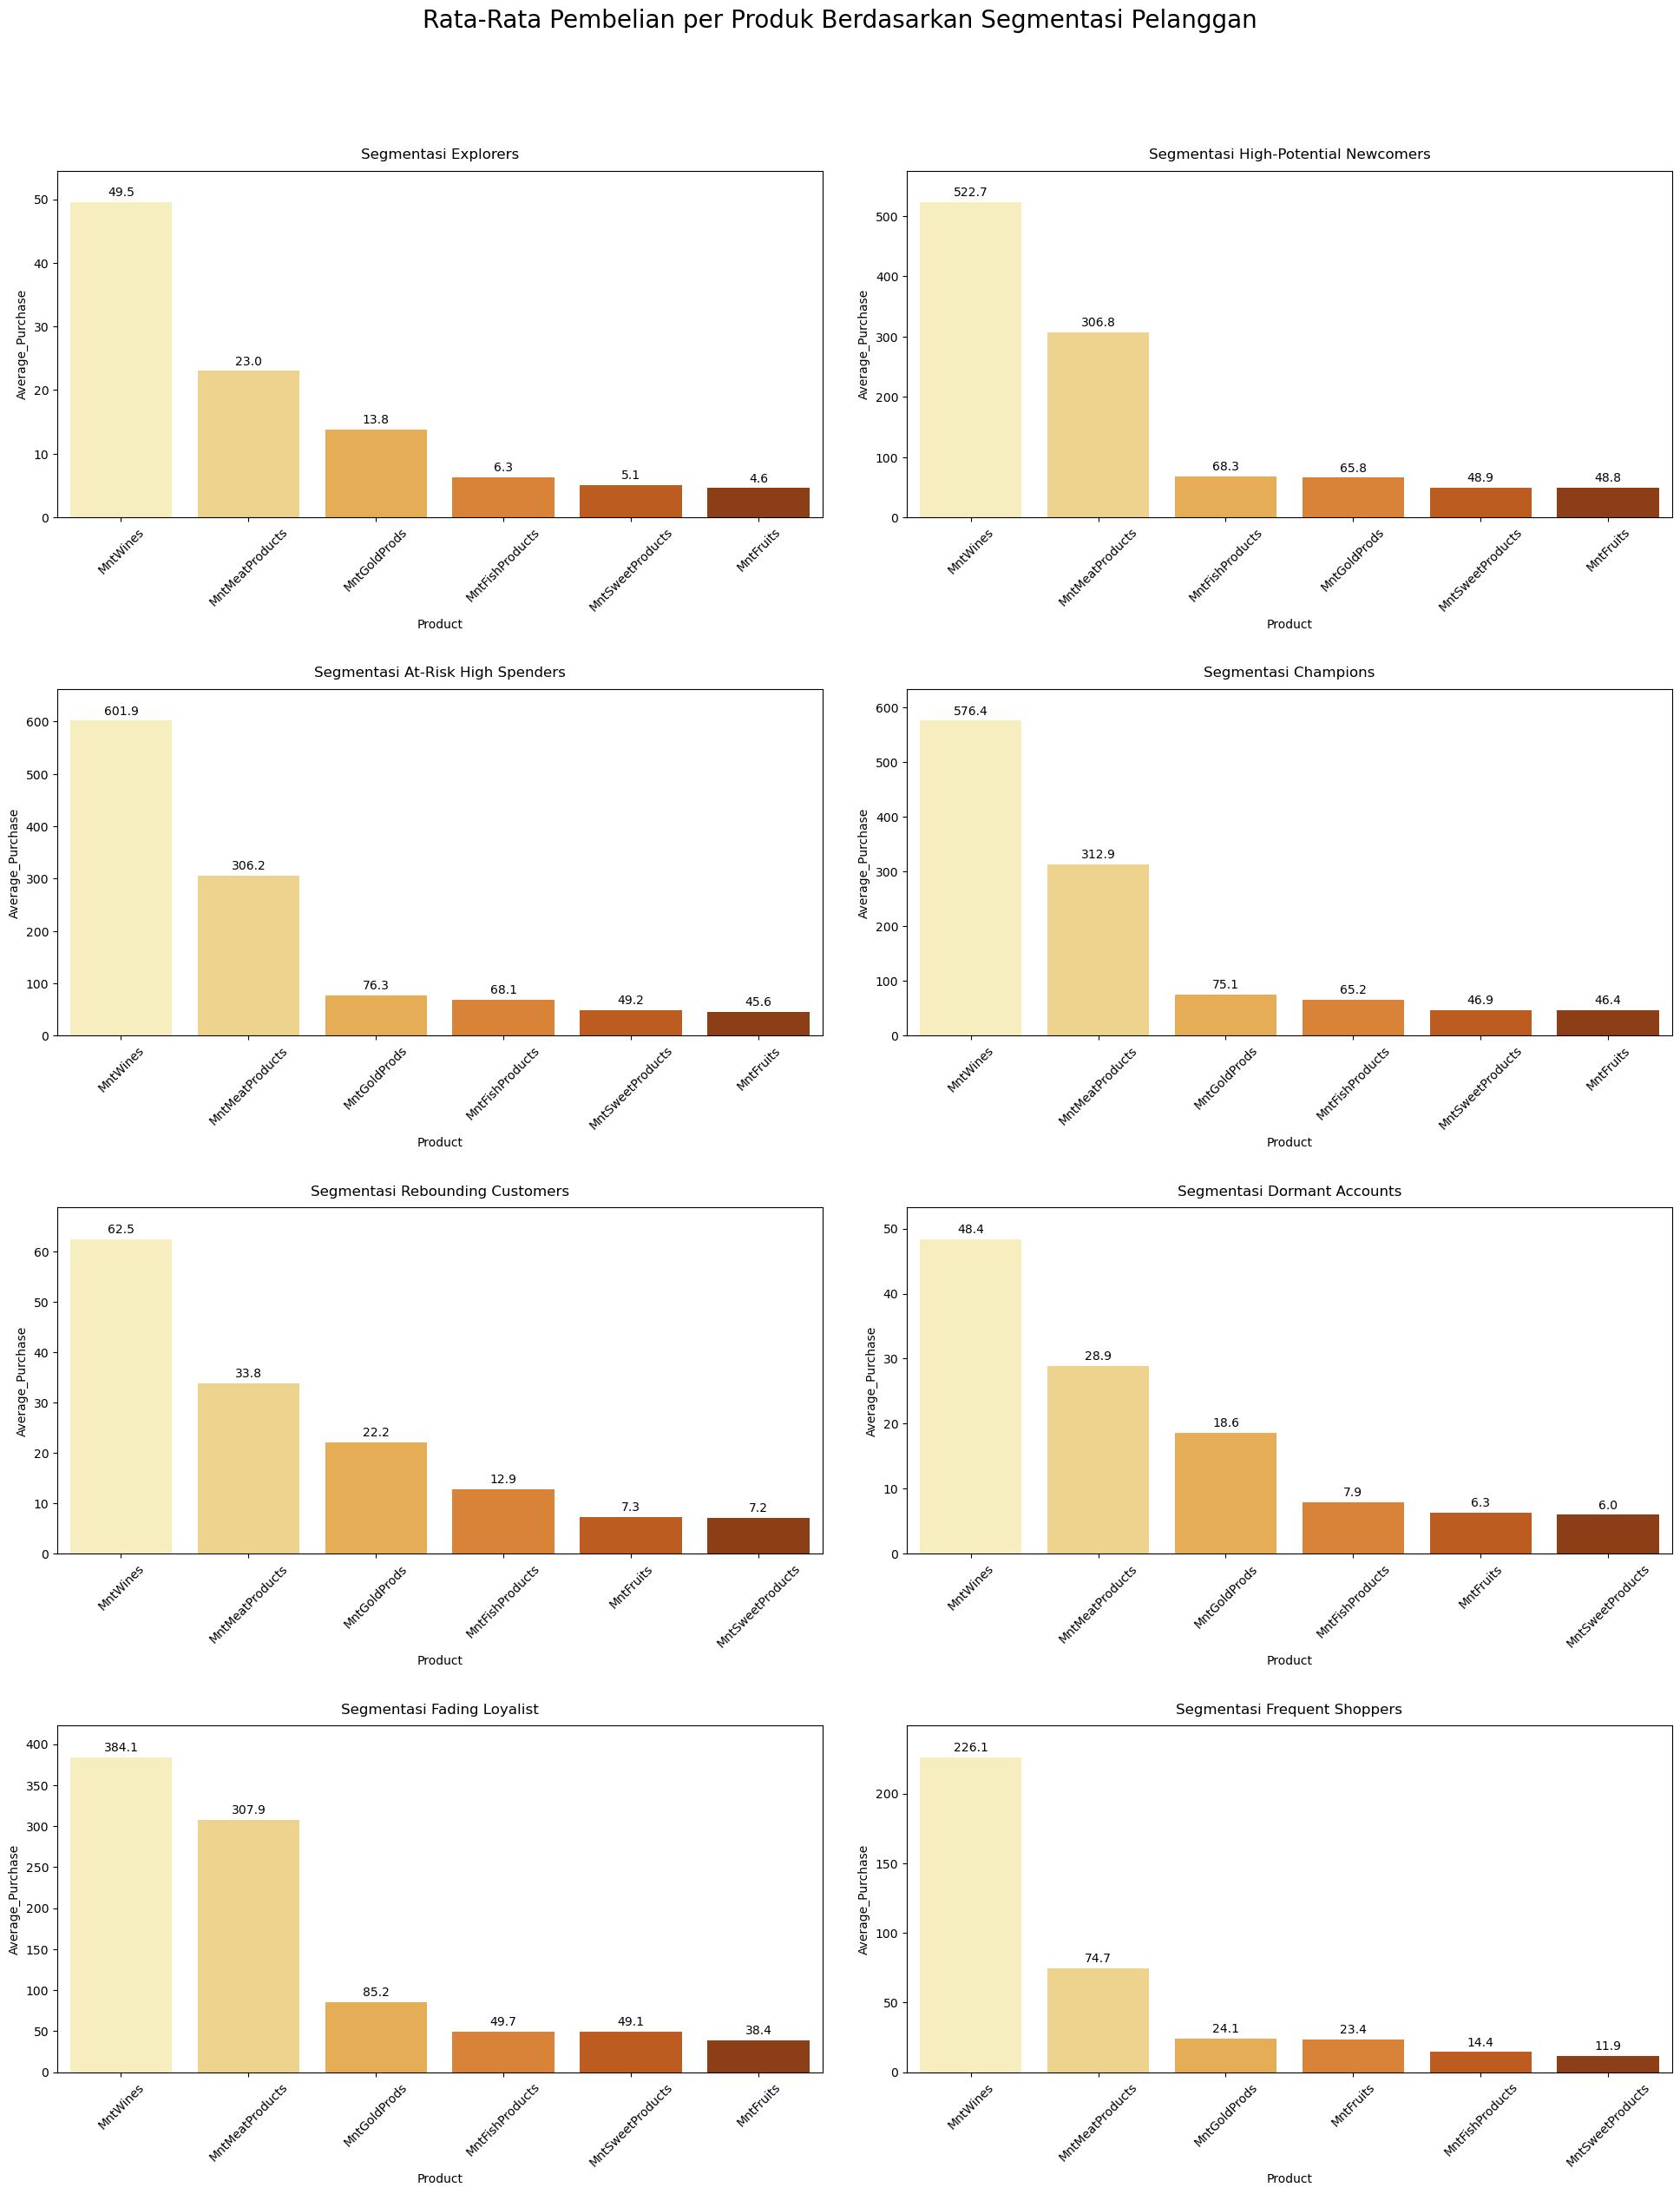

In [95]:
# Buat figure dan axes dengan grid 4x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

# Atur judul utama
plt.suptitle('Rata-Rata Pembelian per Produk Berdasarkan Segmentasi Pelanggan', size=20, y=1.02)

# Daftar data dan judul untuk setiap subplot
segment_data = [
    (explorers_avg, 'Segmentasi Explorers'),
    (hp_avg, 'Segmentasi High-Potential Newcomers'),
    (rh_avg, 'Segmentasi At-Risk High Spenders'),
    (champions_avg, 'Segmentasi Champions'),
    (rb_avg, 'Segmentasi Rebounding Customers'),
    (da_avg, 'Segmentasi Dormant Accounts'),
    (fl_avg, 'Segmentasi Fading Loyalist'),
    (fs_avg, 'Segmentasi Frequent Shoppers')
]

# Buat plot untuk setiap segmentasi
for i, (data, title) in enumerate(segment_data):
    row = i // 2  # 2 kolom per baris
    col = i % 2   # 0 atau 1
    ax = axes[row, col]
    
    sns.barplot(data=data, y='Average_Purchase', x='Product', palette='YlOrBr', ax=ax)
    ax.set_title(title, pad=10)
    ax.tick_params(axis='x', rotation=45)
    
    # Tambah label nilai di setiap bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', padding=3)
    
    # Atur margin
    ax.margins(y=0.1)

# Atur layout
plt.tight_layout(pad=3.0)  # Beri jarak ekstra antar subplot
plt.show()

#### Total Pembelian Produk

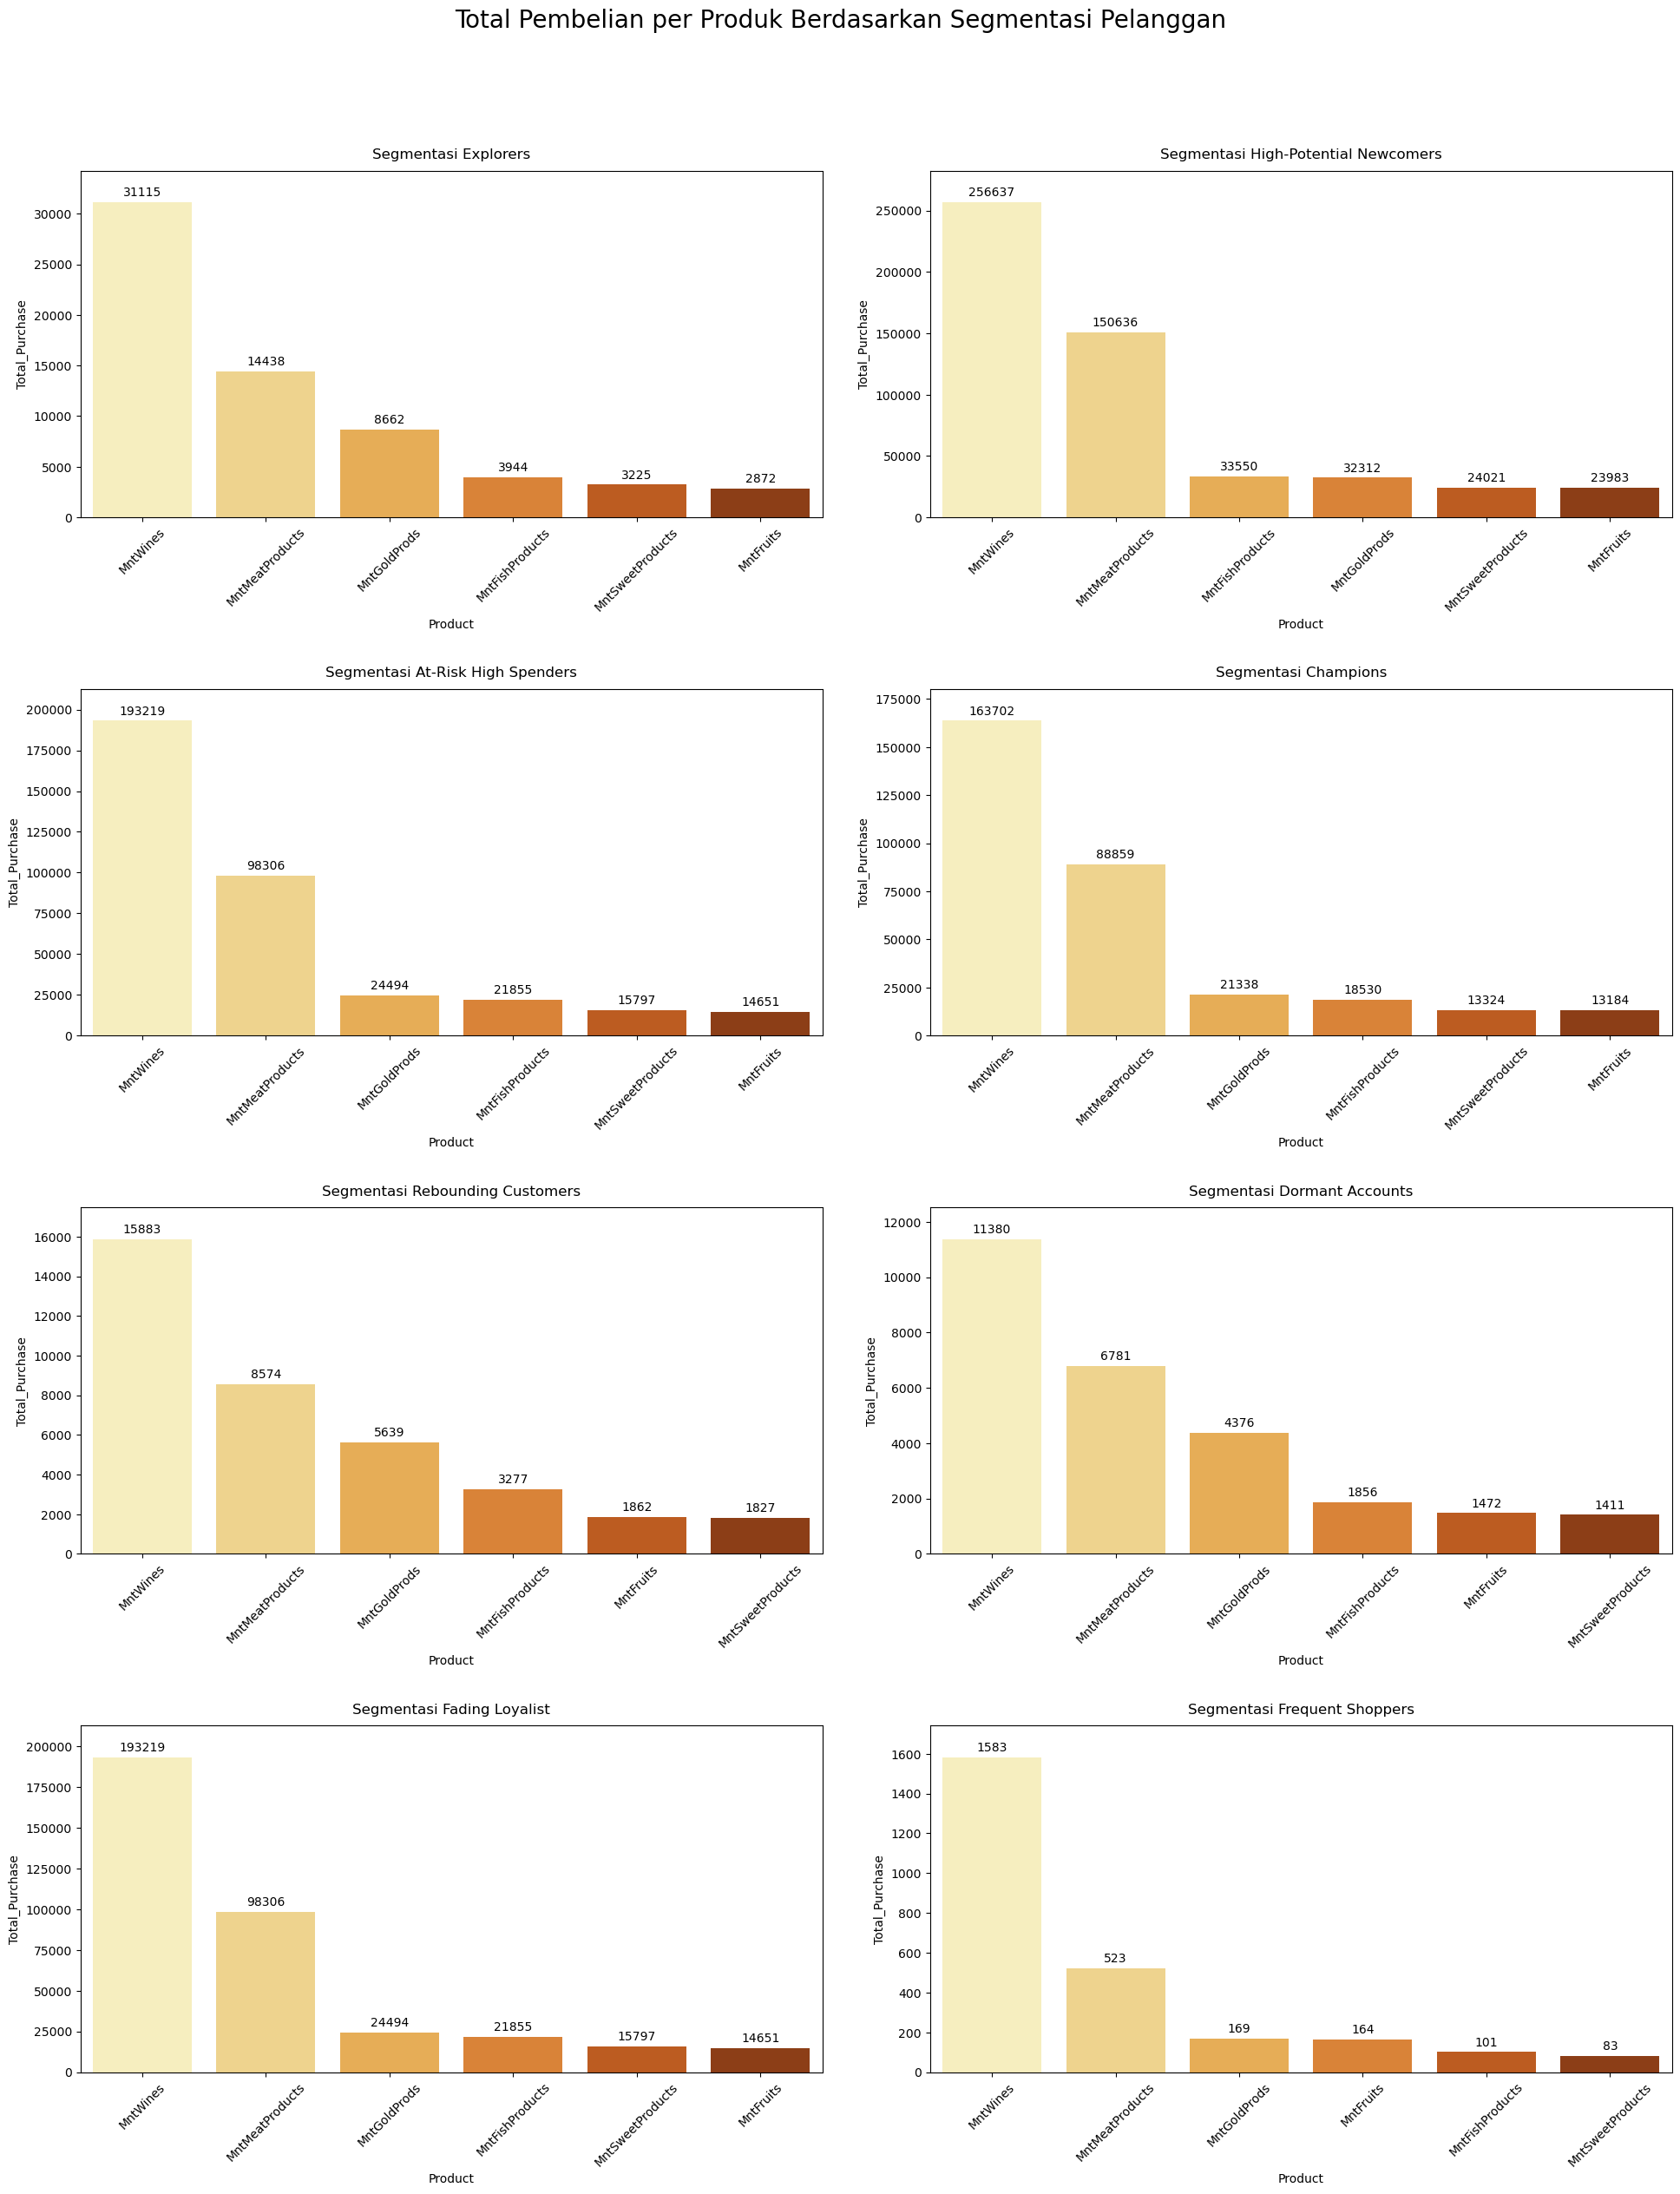

In [96]:
# Buat figure dan axes dengan grid 4x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

# Atur judul utama
plt.suptitle('Total Pembelian per Produk Berdasarkan Segmentasi Pelanggan', size=20, y=1.02)

# Daftar data dan judul untuk setiap subplot
segment_data = [
    (explorers_total, 'Segmentasi Explorers'),
    (hp_total, 'Segmentasi High-Potential Newcomers'),
    (rh_total, 'Segmentasi At-Risk High Spenders'),
    (champions_total, 'Segmentasi Champions'),
    (rb_total, 'Segmentasi Rebounding Customers'),
    (da_total, 'Segmentasi Dormant Accounts'),
    (fl_total, 'Segmentasi Fading Loyalist'),
    (fs_total, 'Segmentasi Frequent Shoppers')
]

# Buat plot untuk setiap segmentasi
for i, (data, title) in enumerate(segment_data):
    row = i // 2  # 2 kolom per baris
    col = i % 2   # 0 atau 1
    ax = axes[row, col]
    
    sns.barplot(data=data, y='Total_Purchase', x='Product', palette='YlOrBr', ax=ax)
    ax.set_title(title, pad=10)
    ax.tick_params(axis='x', rotation=45)
    
    # Tambah label nilai di setiap bar
    for container in ax.containers:
        ax.bar_label(container, padding=3)
    
    # Atur margin
    ax.margins(y=0.1)

# Atur layout
plt.tight_layout(pad=3.0)  # Beri jarak ekstra antar subplot
plt.show()

#### Total Pelanggan 

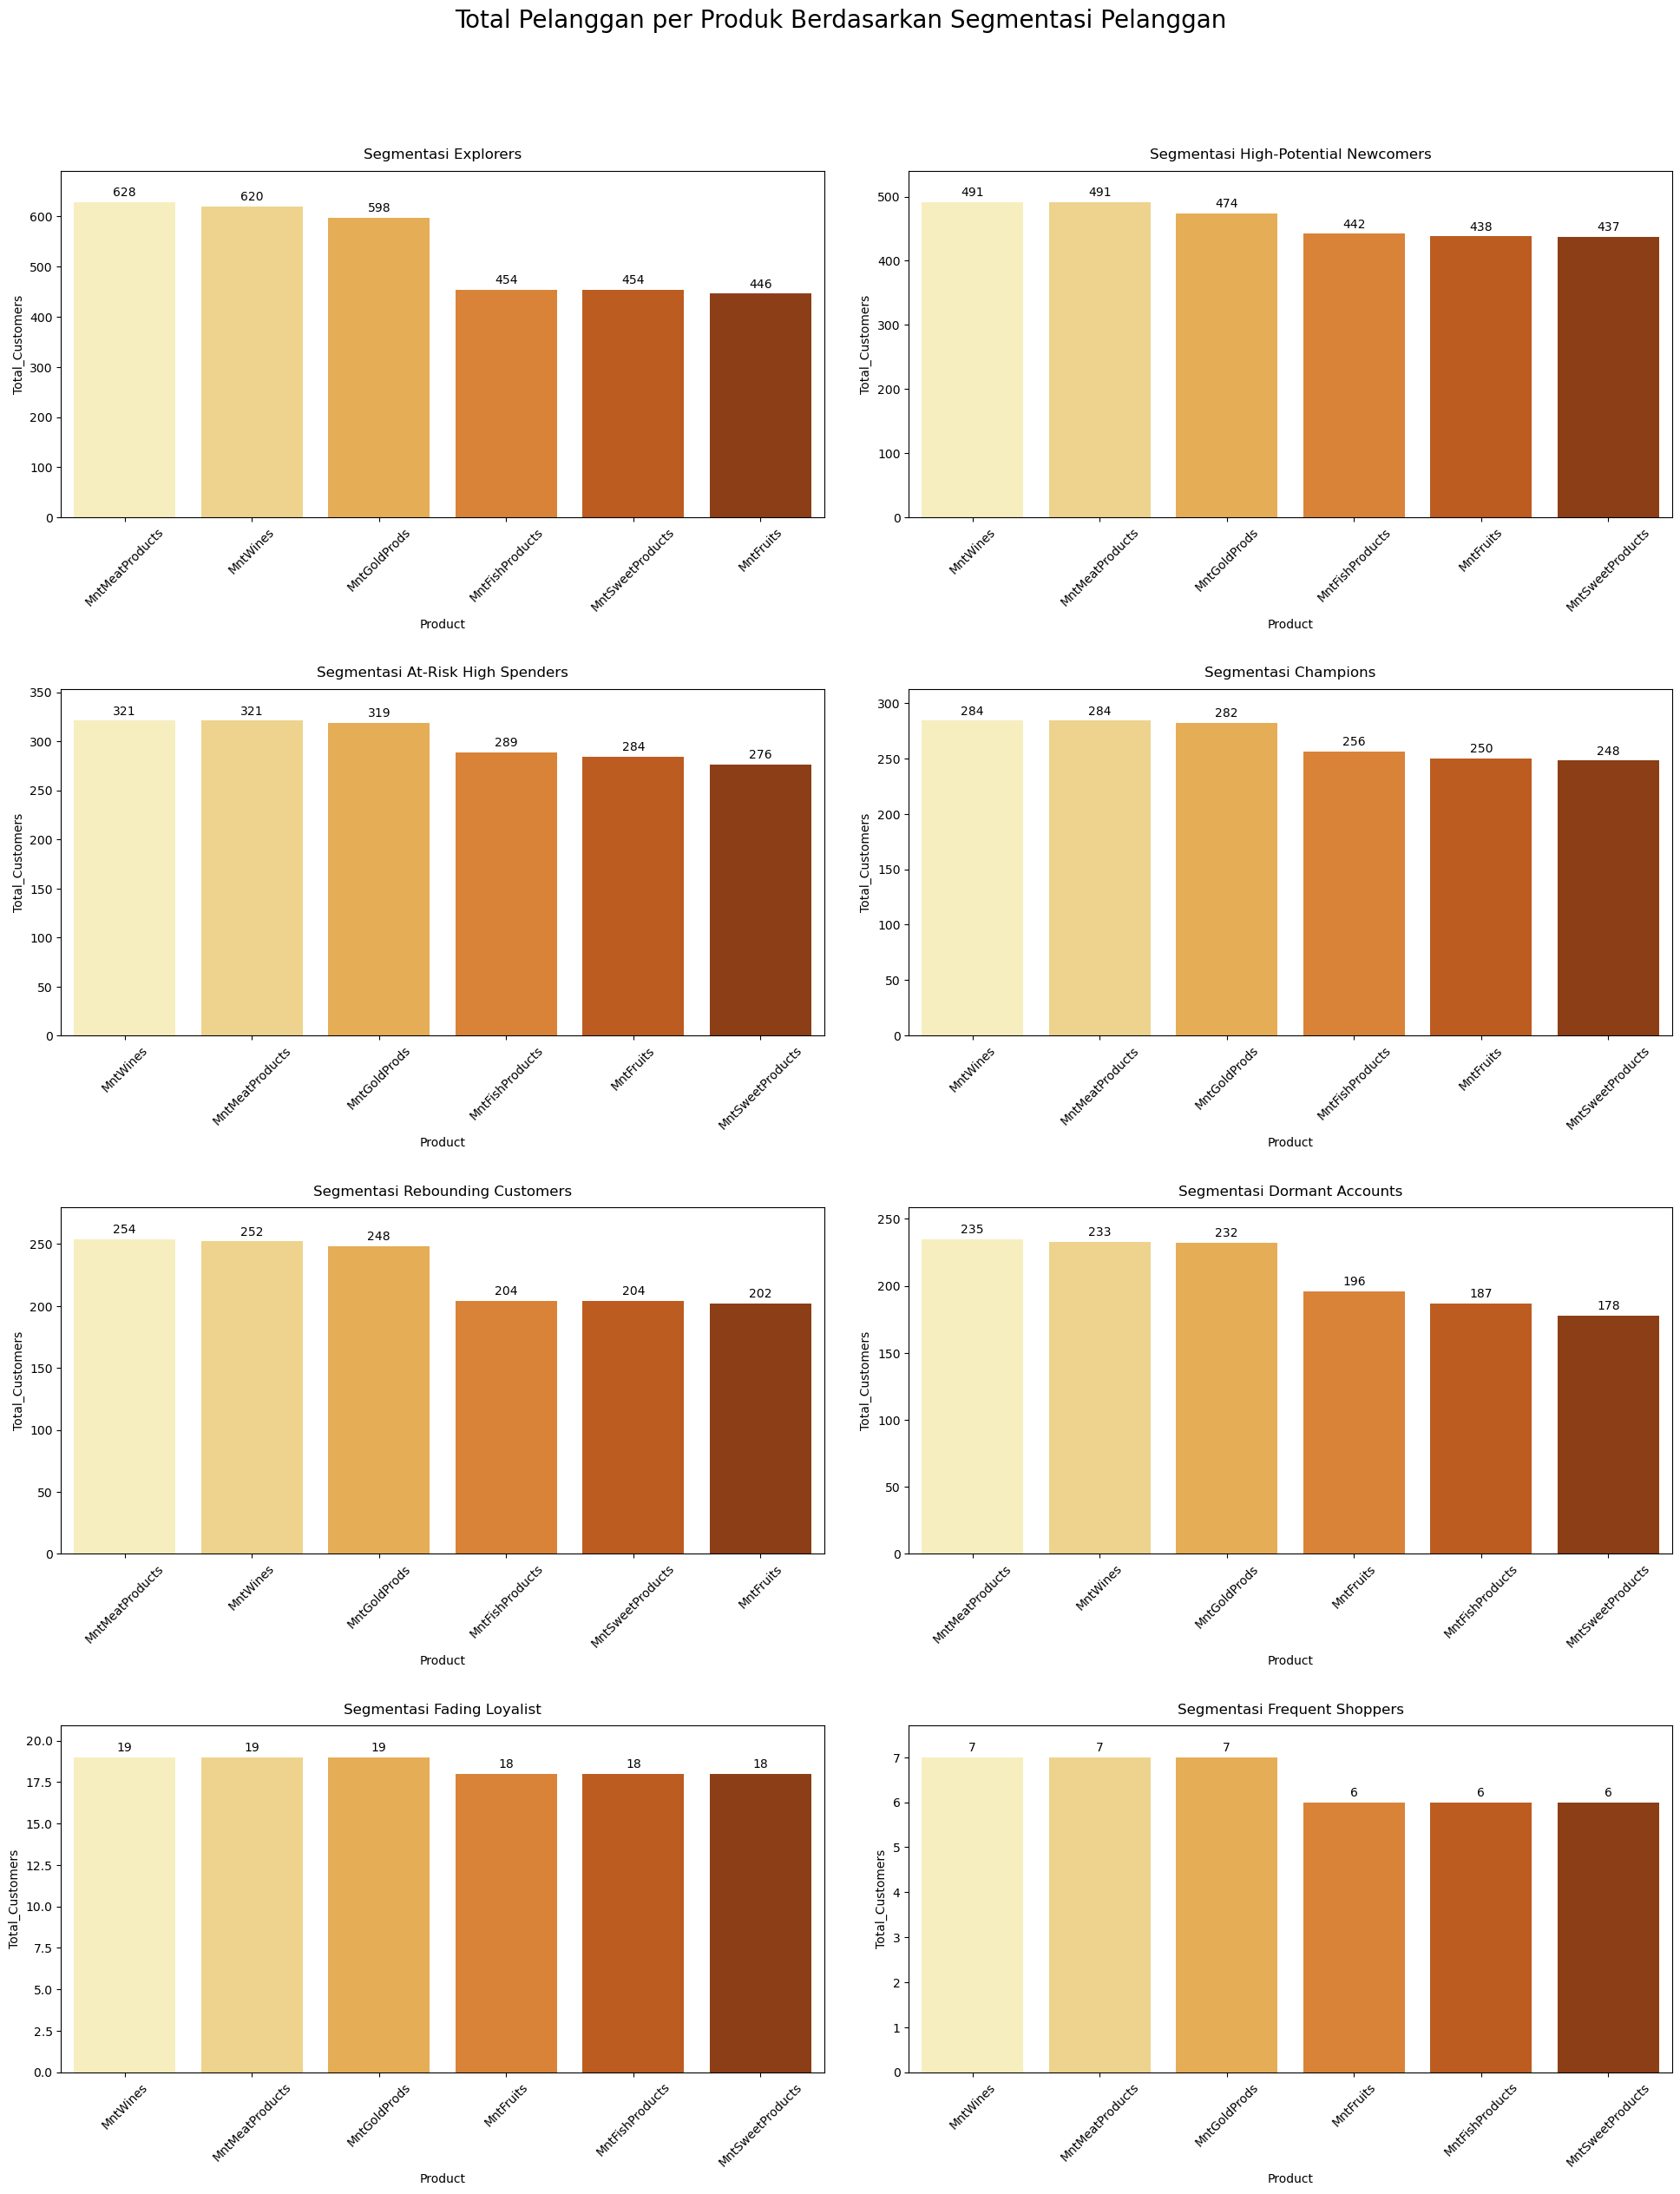

In [97]:
# Buat figure dan axes dengan grid 4x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

# Atur judul utama
plt.suptitle('Total Pelanggan per Produk Berdasarkan Segmentasi Pelanggan', size=20, y=1.02)

# Daftar data dan judul untuk setiap subplot
segment_data = [
    (pur_counts_explorers, 'Segmentasi Explorers'),
    (pur_counts_hp, 'Segmentasi High-Potential Newcomers'),
    (pur_counts_rh, 'Segmentasi At-Risk High Spenders'),
    (pur_counts_champions, 'Segmentasi Champions'),
    (pur_counts_rb, 'Segmentasi Rebounding Customers'),
    (pur_counts_da, 'Segmentasi Dormant Accounts'),
    (pur_counts_fl, 'Segmentasi Fading Loyalist'),
    (pur_counts_fs, 'Segmentasi Frequent Shoppers')
]

# Buat plot untuk setiap segmentasi
for i, (data, title) in enumerate(segment_data):
    row = i // 2  # 2 kolom per baris
    col = i % 2   # 0 atau 1
    ax = axes[row, col]
    
    sns.barplot(data=data, y='Total_Customers', x='Product', palette='YlOrBr', ax=ax)
    ax.set_title(title, pad=10)
    ax.tick_params(axis='x', rotation=45)
    
    # Tambah label nilai di setiap bar
    for container in ax.containers:
        ax.bar_label(container, padding=3)
    
    # Atur margin
    ax.margins(y=0.1)

# Atur layout
plt.tight_layout(pad=3.0)  # Beri jarak ekstra antar subplot
plt.show()

Berdasarkan analisis di atas, dapat diambil kesimpulan bahwa:
- Produk Daging menunjukkan performa penjualan terkuat karena memiliki total penjualan tertinggi di semua segmen pelanggan. Hal ini juga didukung oleh jumlah pelanggan terbanyak dan rata-rata pembelian tertinggi.
- Produk daging berada pada peringkat ke-2 dalam hal total penjualan hampir di semua segmen .
- Produk dengan penjualan menengah adalah produk Gold, namun masih memiliki jumlah pelanggan yang besar. Namun rata-rata pembelian cukup rendah.
- Produk dengan performa lemah adalah produk ikan, makanan manis, serta buah. Produk-produk ini memiliki kontribusi penjualan paling kecil pada semua segmen.
- Champions, At-Risk High Spenders, dan High-Potential Newcomers adalah kontributor penjualan terbesar lintas produk.

## 3. Pengaruh Penggunaan Diskon

### Monetary

Dalam analisis pelanggan yang melibatkan diskon, monetary mambantu mengidentifikasi pelanggan yang tetap menghasilkan nilai tinggi meskipun mereka membeli produk dengan harga diskon. Hal ini penting untuk memahami apakah diskon benar-benar mendorong peningkatan pendapatan.

#### Analisis Korelasi Dasar

In [98]:
from scipy.stats import shapiro

# uji normalitas data
stats, pvalue = shapiro(df_clean['monetary'])
if pvalue <= 0.05:
    print(f'Pvalue = {pvalue}.Tolak H0. Terima H1. Maka data tidak berdistribusi normal')
else:
    print(f'Pvalue = {pvalue}. Gagal Tolak H0. Terima H0. Maka data berdistribusi normal')

Pvalue = 2.7805851314631663e-40.Tolak H0. Terima H1. Maka data tidak berdistribusi normal


Korelasi antara diskon dan monetary: -0.07


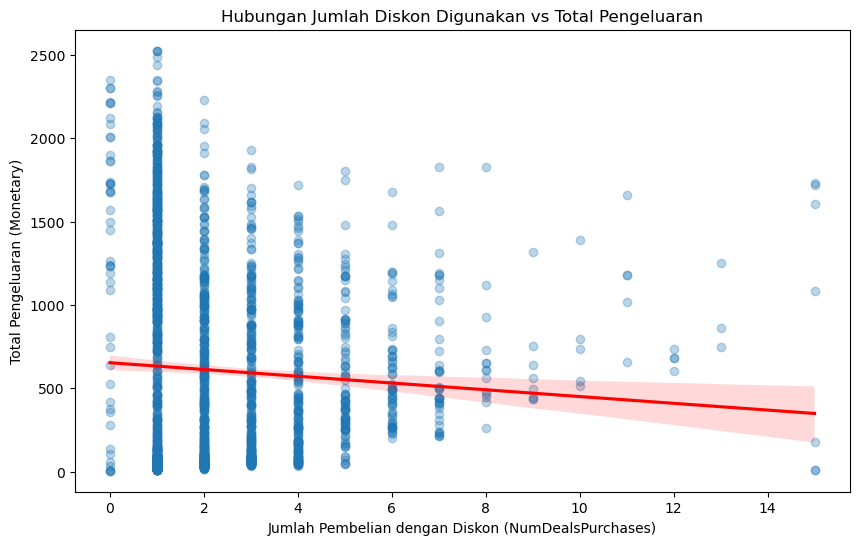

In [99]:
# Hitung Korelasi
corr = df_clean[['NumDealsPurchases', 'monetary']].corr().iloc[0,1]
print(f'Korelasi antara diskon dan monetary: {corr:.2f}')

# Visualisasi scatter plot
plt.figure(figsize=(10,6))
sns.regplot(data=df_clean, x='NumDealsPurchases', y='monetary', 
           scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Hubungan Jumlah Diskon Digunakan vs Total Pengeluaran')
plt.xlabel('Jumlah Pembelian dengan Diskon (NumDealsPurchases)')
plt.ylabel('Total Pengeluaran (Monetary)')
plt.show()

- Terdapat variasi dalam total pengeluaran meskipun jumlah diskon yang digunakan bervariasi. Namun, tidak terlihat pola yang jelas atau korelasi langsung antara peningkatan jumlah diskon dengan peningkatan atau penurunan total pengeluaran. 
- Beberapa pelanggan menggunakan diskon dalam jumlah yang signifikan, tetapi total pengeluaran mereka tidak selalu tinggi.
- Ada pelanggan yang menggunakan diskon hingga 6-8 kali tetapi total pengeluarannya hanya sekitar $500-$1000. Hal ini menunjukkan bahwa diskon mungkin digunakan untuk pembelian barang-barang dengan harga rendah.
- Pelanggan dengan total pengeluaran tinggi ($2000-$2500) tidak selalu menggunakan banyak diskon. Ini berarti pelanggan dengan pengeluaran besar kurang tertarik pada diskon atau lebih fokus pada kualitas/nilai produk daripada harga.

#### Uji Statistik

Hipotesis
- H0: Tidak ada perbedaan signifikan dalam total pengeluaran antara pelanggan yang menggunakan diskon dan yang tidak menggunakan diskon.
- H1: Ada perbedaan signifikan dalam total pengeluaran antara pelanggan yang menggunakan diskon dan yang tidak menggunakan diskon.

In [100]:
from scipy.stats import mannwhitneyu

# Bandingkan pelanggan yang pakai vs tidak pakai diskon
diskon = df_clean[df_clean['NumDealsPurchases'] > 0]['monetary']
no_diskon = df_clean[df_clean['NumDealsPurchases'] == 0]['monetary']

stat, p_value = mannwhitneyu(diskon, no_diskon, alternative='two-sided')
print(f"P-value: {p_value}")

P-value: 1.9167185568778962e-07


In [101]:
if p_value <= 0.05:
    print('H0 ditolak. Ada perbedaan signifikan dalam total pengeluaran antara pelanggan yang menggunakan diskon dan yang tidak menggunakan diskon.')
else:
    print('H0 gagal ditolak, artinya tidak ada bukti kuat bahwa penggunaan diskon memengaruhi total pengeluaran')

H0 ditolak. Ada perbedaan signifikan dalam total pengeluaran antara pelanggan yang menggunakan diskon dan yang tidak menggunakan diskon.


Karena H0 ditolak, maka dapat disimpulkan bahwa pelanggan yang pakai diskon memiliki total pengeluaran yang secara statistik berbeda dengan yang tidak pakai diskon.

In [102]:
print(f"Rata-rata pengeluaran pakai diskon: {diskon.mean():.2f}")
print(f"Rata-rata pengeluaran tidak pakai diskon: {no_diskon.mean():.2f}")

Rata-rata pengeluaran pakai diskon: 592.61
Rata-rata pengeluaran tidak pakai diskon: 1234.76


Dapat dilihat bahwa rata-rata pengeluaran pelanggan yang menggunakan diskon lebih rendah dari pelanggan yang tidak menggunakan diskon, oleh karena itu dapat disimpulkan bahwa promosi diskon justru menarik pelanggan dengan pengeluaran lebih kecil.

### Frequency

Dalam analisis dengan diskon, frequency membantu mengidentifikasi apakah diskon mendorong pelanggan untuk berbelanja lebih sering.

#### Analisis Dasar

In [103]:
from scipy.stats import shapiro
stats, pvalue = shapiro(df_clean['frequency'])
if pvalue <= 0.05:
    print(f'Pvalue = {pvalue}.Tolak H0. Terima H1. Maka data tidak berdistribusi normal')
else:
    print(f'Pvalue = {pvalue}. Gagal Tolak H0. Terima H0. Maka data berdistribusi normal')

Pvalue = 3.0574107540106004e-30.Tolak H0. Terima H1. Maka data tidak berdistribusi normal


In [104]:
stats, pvalue = shapiro(df_clean['NumDealsPurchases'])
if pvalue <= 0.05:
    print(f'Pvalue = {pvalue}.Tolak H0. Terima H1. Maka data tidak berdistribusi normal')
else:
    print(f'Pvalue = {pvalue}. Gagal Tolak H0. Terima H0. Maka data berdistribusi normal')

Pvalue = 1.5505946976005412e-50.Tolak H0. Terima H1. Maka data tidak berdistribusi normal


Korelasi antara diskon dan frequency: 0.12


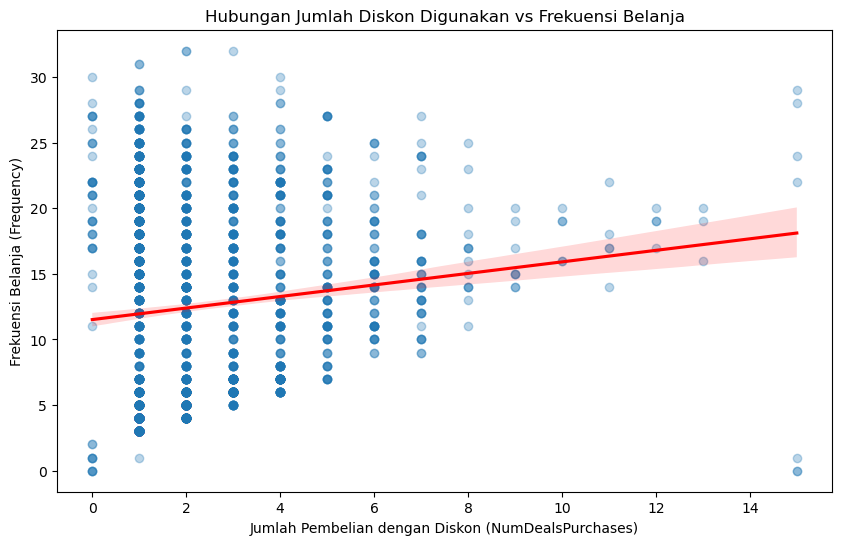

In [105]:
# Hitung Korelasi
corr = df_clean[['NumDealsPurchases', 'frequency']].corr().iloc[0,1]
print(f'Korelasi antara diskon dan frequency: {corr:.2f}')

# Visualisasi scatter plot
plt.figure(figsize=(10,6))
sns.regplot(data=df_clean, x='NumDealsPurchases', y='frequency', 
           scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Hubungan Jumlah Diskon Digunakan vs Frekuensi Belanja')
plt.xlabel('Jumlah Pembelian dengan Diskon (NumDealsPurchases)')
plt.ylabel('Frekuensi Belanja (Frequency)')
plt.show()

- Frekuensi belanja dan jumlah pembelian dengan diskon menunjukkan sebaran data yang tidak membentuk tren linear yang jelas. Artinya tidak ada hubungan langsung yang kuat antara seberapa sering pelanggan berbelanja dan seberapa sering mereka memanfaatkan diskon.
- Beberapa pelanggan yang sering berbelanja hanya sedikit menggunakan diskon. Ini menunjukkan bahwa loyalitas atau kebiasaan belanja mereka tidak sepenuhnya didorong oleh diskon.
- Sebagian pelanggan dengan frekuensi lebih rendah justru menggunakan diskon lebih banyak.

#### Uji Statistik

Hipotesis
- H0: Tidak ada perbedaan signifikan dalam frekuensi belanja antara pelanggan yang menggunakan diskon dan yang tidak menggunakan diskon.
- H1: Ada perbedaan yang signifikan dalam frekuensi belanja antara pelanggan yang menggunakan diskon dan yang tidak menggunakan diskon.

In [106]:
from scipy.stats import mannwhitneyu

# Bandingkan pelanggan yang pakai vs tidak pakai diskon
diskon = df_clean[df_clean['NumDealsPurchases'] > 0]['frequency']
no_diskon = df_clean[df_clean['NumDealsPurchases'] == 0]['frequency']

stat, p_value = mannwhitneyu(diskon, no_diskon, alternative='two-sided')
print(f"P-value: {p_value}")

P-value: 0.0003747771618050673


In [107]:
if p_value <= 0.05:
    print('H0 ditolak. Ada perbedaan signifikan dalam frekuensi belanja antara pelanggan yang menggunakan diskon dan yang tidak menggunakan diskon.')
else:
    print('H0 gagal ditolak, artinya tidak ada bukti kuat bahwa penggunaan diskon memengaruhi frekeunsi belanja')

H0 ditolak. Ada perbedaan signifikan dalam frekuensi belanja antara pelanggan yang menggunakan diskon dan yang tidak menggunakan diskon.


In [108]:
print(f"Rata-rata frekuensi pengguna diskon: {diskon.mean():.2f}")
print(f"Rata-rata frekuensi non-pengguna diskon: {no_diskon.mean():.2f}")

Rata-rata frekuensi pengguna diskon: 12.45
Rata-rata frekuensi non-pengguna diskon: 16.80


Dari analisis tersebut dapat dilihat bahwa frekuensi belanja pelanggan yang tidak menggunakan diskon secara signifikan lebih tinggi dibandingkan pengguna diskon. 

## 4. Distribusi Kanal Penjualan

In [109]:
# List kanal penjualan
type_purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Hitung jumlah pelanggan yang membeli (nilai > 0)
type_counts = (df_clean[type_purchases] > 0).sum().reset_index()
type_counts.columns = ['Kanal_Penjualan', 'Total_Pelanggan']
type_counts = type_counts.sort_values('Total_Pelanggan', ascending=False)
type_counts

,Kanal_Penjualan,Total_Pelanggan
2,NumStorePurchases,2225
0,NumWebPurchases,2191
1,NumCatalogPurchases,1654


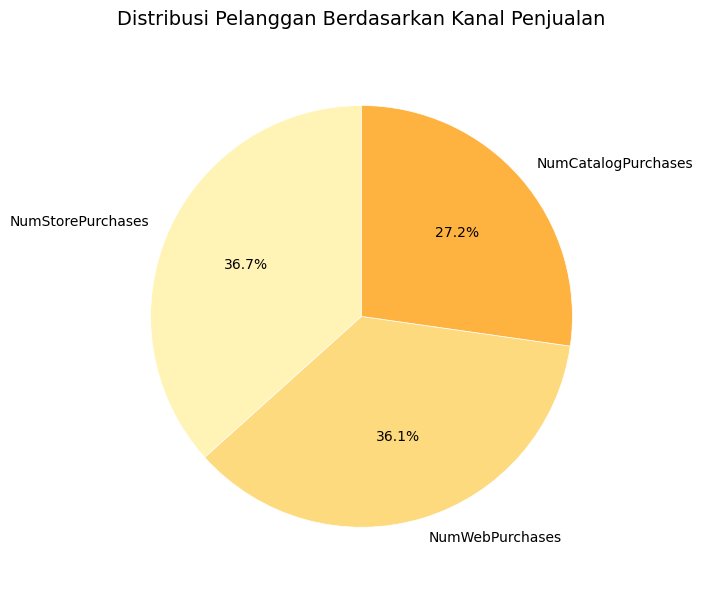

In [110]:
plt.figure(figsize=(10, 6))

# Buat pie chart
plt.pie(
    x=type_counts['Total_Pelanggan'],
    labels=type_counts['Kanal_Penjualan'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('YlOrBr'),
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},  # Garis tepi putih
    textprops={'fontsize': 10}
)

# Judul 
plt.title('Distribusi Pelanggan Berdasarkan Kanal Penjualan', fontsize=14, pad=20)


# Atur layout
plt.tight_layout()
plt.show()

In [111]:
# Hitung Total Penjualan 
tp_kanal = df_clean[type_purchases].sum().reset_index()
tp_kanal.columns = ['Kanal_Penjualan', 'Total_Pembelian']
tp_kanal = tp_kanal.sort_values('Total_Pembelian', ascending=False)
tp_kanal

,Kanal_Penjualan,Total_Pembelian
2,NumStorePurchases,12970
0,NumWebPurchases,9150
1,NumCatalogPurchases,5963


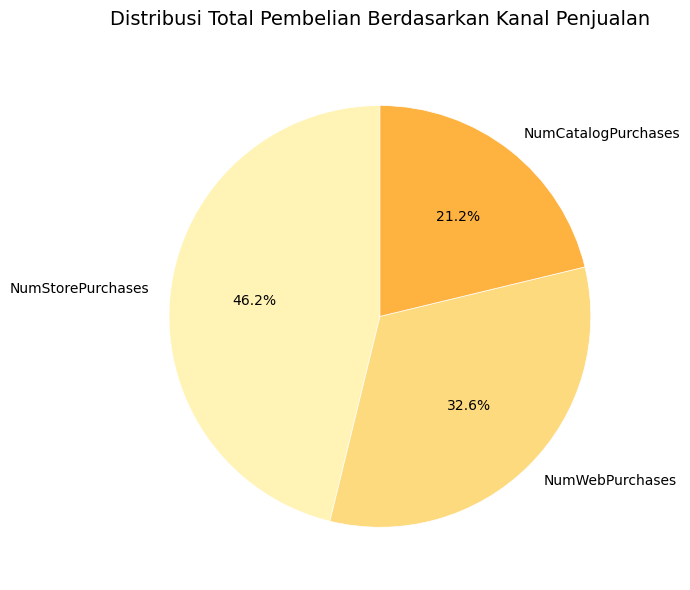

In [112]:
plt.figure(figsize=(10, 6))

# Buat pie chart
plt.pie(
    x=tp_kanal['Total_Pembelian'],
    labels=tp_kanal['Kanal_Penjualan'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('YlOrBr'),
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},  # Garis tepi putih
    textprops={'fontsize': 10}
)

# Judul 
plt.title('Distribusi Total Pembelian Berdasarkan Kanal Penjualan', fontsize=14, pad=20)

# Atur layout
plt.tight_layout()
plt.show()

- Distribusi pelanggan berdasarkan kanal dapat dilihat bahwa Store dan Web memiliki jumlah pelanggan hampir setara. Sedangkan katalog lebih sedikit digunakan oleh pelanggan.
- Store memberikan kontribusi terbesar pada penjualan, meskipun hanya selisih sedikit jumlah pelanggannya dengan Web. Ini berarti bahwa transaksi di toko fisik cenderung memiliki nilai pembelian lebih tinggi.
- Katalog merupakan kanal dengan kontribusi terendah baik dari segi jumlah pelanggan maupun total pembelian.

## 5. Efektivitas Kampanye atau Promosi 

In [113]:
# List Acc Kampanye
Cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response' ]

# Hitung jumlah pelanggan yang menerima penawaran (nilai > 0)
cmp_counts = (df_clean[Cmp] > 0).sum().reset_index()
cmp_counts.columns = ['Promosi', 'Total_Pelanggan']
cmp_counts = cmp_counts.sort_values('Total_Pelanggan', ascending=False)
cmp_counts

,Promosi,Total_Pelanggan
5,Response,334
3,AcceptedCmp4,167
2,AcceptedCmp3,163
4,AcceptedCmp5,163
0,AcceptedCmp1,144
1,AcceptedCmp2,30


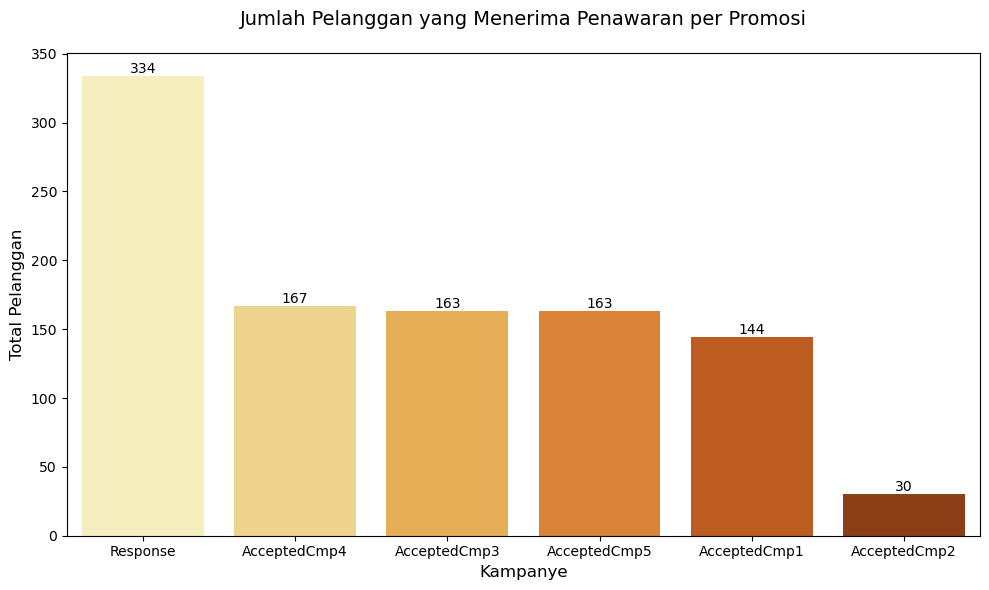

In [114]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=cmp_counts,
    x='Promosi',
    y='Total_Pelanggan',
    palette='YlOrBr',
    linewidth=1.5
)

# Judul dan label
plt.title('Jumlah Pelanggan yang Menerima Penawaran per Promosi', fontsize=14, pad=20)
plt.xlabel('Kampanye', fontsize=12)
plt.ylabel('Total Pelanggan', fontsize=12)

# Anotasi nilai di atas bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )


plt.tight_layout()
plt.show()

In [115]:
# Hitung jumlah pelanggan explorers yang menerima penawaran (nilai > 0)
cmp_counts1 = (explorers[Cmp] > 0).sum().reset_index()
cmp_counts1.columns = ['Promosi', 'Total_Pelanggan']
cmp_counts1 = cmp_counts1.sort_values('Total_Pelanggan', ascending=False)
cmp_counts1

,Promosi,Total_Pelanggan
2,AcceptedCmp3,45
5,Response,31
3,AcceptedCmp4,12
0,AcceptedCmp1,3
1,AcceptedCmp2,2
4,AcceptedCmp5,0


In [116]:
# Hitung jumlah pelanggan High-Potensial yang menerima penawaran (nilai > 0)
cmp_counts2 = (hp[Cmp] > 0).sum().reset_index()
cmp_counts2.columns = ['Promosi', 'Total_Pelanggan']
cmp_counts2 = cmp_counts2.sort_values('Total_Pelanggan', ascending=False)
cmp_counts2

,Promosi,Total_Pelanggan
4,AcceptedCmp5,81
0,AcceptedCmp1,76
5,Response,71
3,AcceptedCmp4,66
2,AcceptedCmp3,44
1,AcceptedCmp2,12


In [117]:
# Hitung jumlah pelanggan At-Risk High Spenders yang menerima penawaran (nilai > 0)
cmp_counts3 = (rh[Cmp] > 0).sum().reset_index()
cmp_counts3.columns = ['Promosi', 'Total_Pelanggan']
cmp_counts3 = cmp_counts3.sort_values('Total_Pelanggan', ascending=False)
cmp_counts3

,Promosi,Total_Pelanggan
5,Response,67
3,AcceptedCmp4,47
4,AcceptedCmp5,41
0,AcceptedCmp1,32
2,AcceptedCmp3,18
1,AcceptedCmp2,11


In [118]:
# Hitung jumlah pelanggan Champions yang menerima penawaran (nilai > 0)
cmp_counts4 = (champions[Cmp] > 0).sum().reset_index()
cmp_counts4.columns = ['Promosi', 'Total_Pelanggan']
cmp_counts4 = cmp_counts4.sort_values('Total_Pelanggan', ascending=False)
cmp_counts4

,Promosi,Total_Pelanggan
5,Response,90
4,AcceptedCmp5,38
0,AcceptedCmp1,32
3,AcceptedCmp4,32
2,AcceptedCmp3,26
1,AcceptedCmp2,4


In [119]:
# Hitung jumlah pelanggan Rebounding yang menerima penawaran (nilai > 0)
cmp_counts5 = (rb[Cmp] > 0).sum().reset_index()
cmp_counts5.columns = ['Promosi', 'Total_Pelanggan']
cmp_counts5 = cmp_counts5.sort_values('Total_Pelanggan', ascending=False)
cmp_counts5

,Promosi,Total_Pelanggan
5,Response,52
2,AcceptedCmp3,14
3,AcceptedCmp4,3
0,AcceptedCmp1,0
1,AcceptedCmp2,0
4,AcceptedCmp5,0


In [120]:
# Hitung jumlah pelanggan Dormant Account yang menerima penawaran (nilai > 0)
cmp_counts6 = (da[Cmp] > 0).sum().reset_index()
cmp_counts6.columns = ['Promosi', 'Total_Pelanggan']
cmp_counts6 = cmp_counts6.sort_values('Total_Pelanggan', ascending=False)
cmp_counts6

,Promosi,Total_Pelanggan
5,Response,18
2,AcceptedCmp3,14
3,AcceptedCmp4,4
0,AcceptedCmp1,0
1,AcceptedCmp2,0
4,AcceptedCmp5,0


In [121]:
# Hitung jumlah pelanggan Fading Loyalist yang menerima penawaran (nilai > 0)
cmp_counts7 = (fl[Cmp] > 0).sum().reset_index()
cmp_counts7.columns = ['Promosi', 'Total_Pelanggan']
cmp_counts7 = cmp_counts7.sort_values('Total_Pelanggan', ascending=False)
cmp_counts7

,Promosi,Total_Pelanggan
5,Response,4
3,AcceptedCmp4,3
4,AcceptedCmp5,3
2,AcceptedCmp3,2
0,AcceptedCmp1,1
1,AcceptedCmp2,1


In [122]:
# Hitung jumlah pelanggan Frequent Shoppers yang menerima penawaran (nilai > 0)
cmp_counts8 = (fs[Cmp] > 0).sum().reset_index()
cmp_counts8.columns = ['Promosi', 'Total_Pelanggan']
cmp_counts8 = cmp_counts8.sort_values('Total_Pelanggan', ascending=False)
cmp_counts8

,Promosi,Total_Pelanggan
5,Response,1
0,AcceptedCmp1,0
1,AcceptedCmp2,0
2,AcceptedCmp3,0
3,AcceptedCmp4,0
4,AcceptedCmp5,0


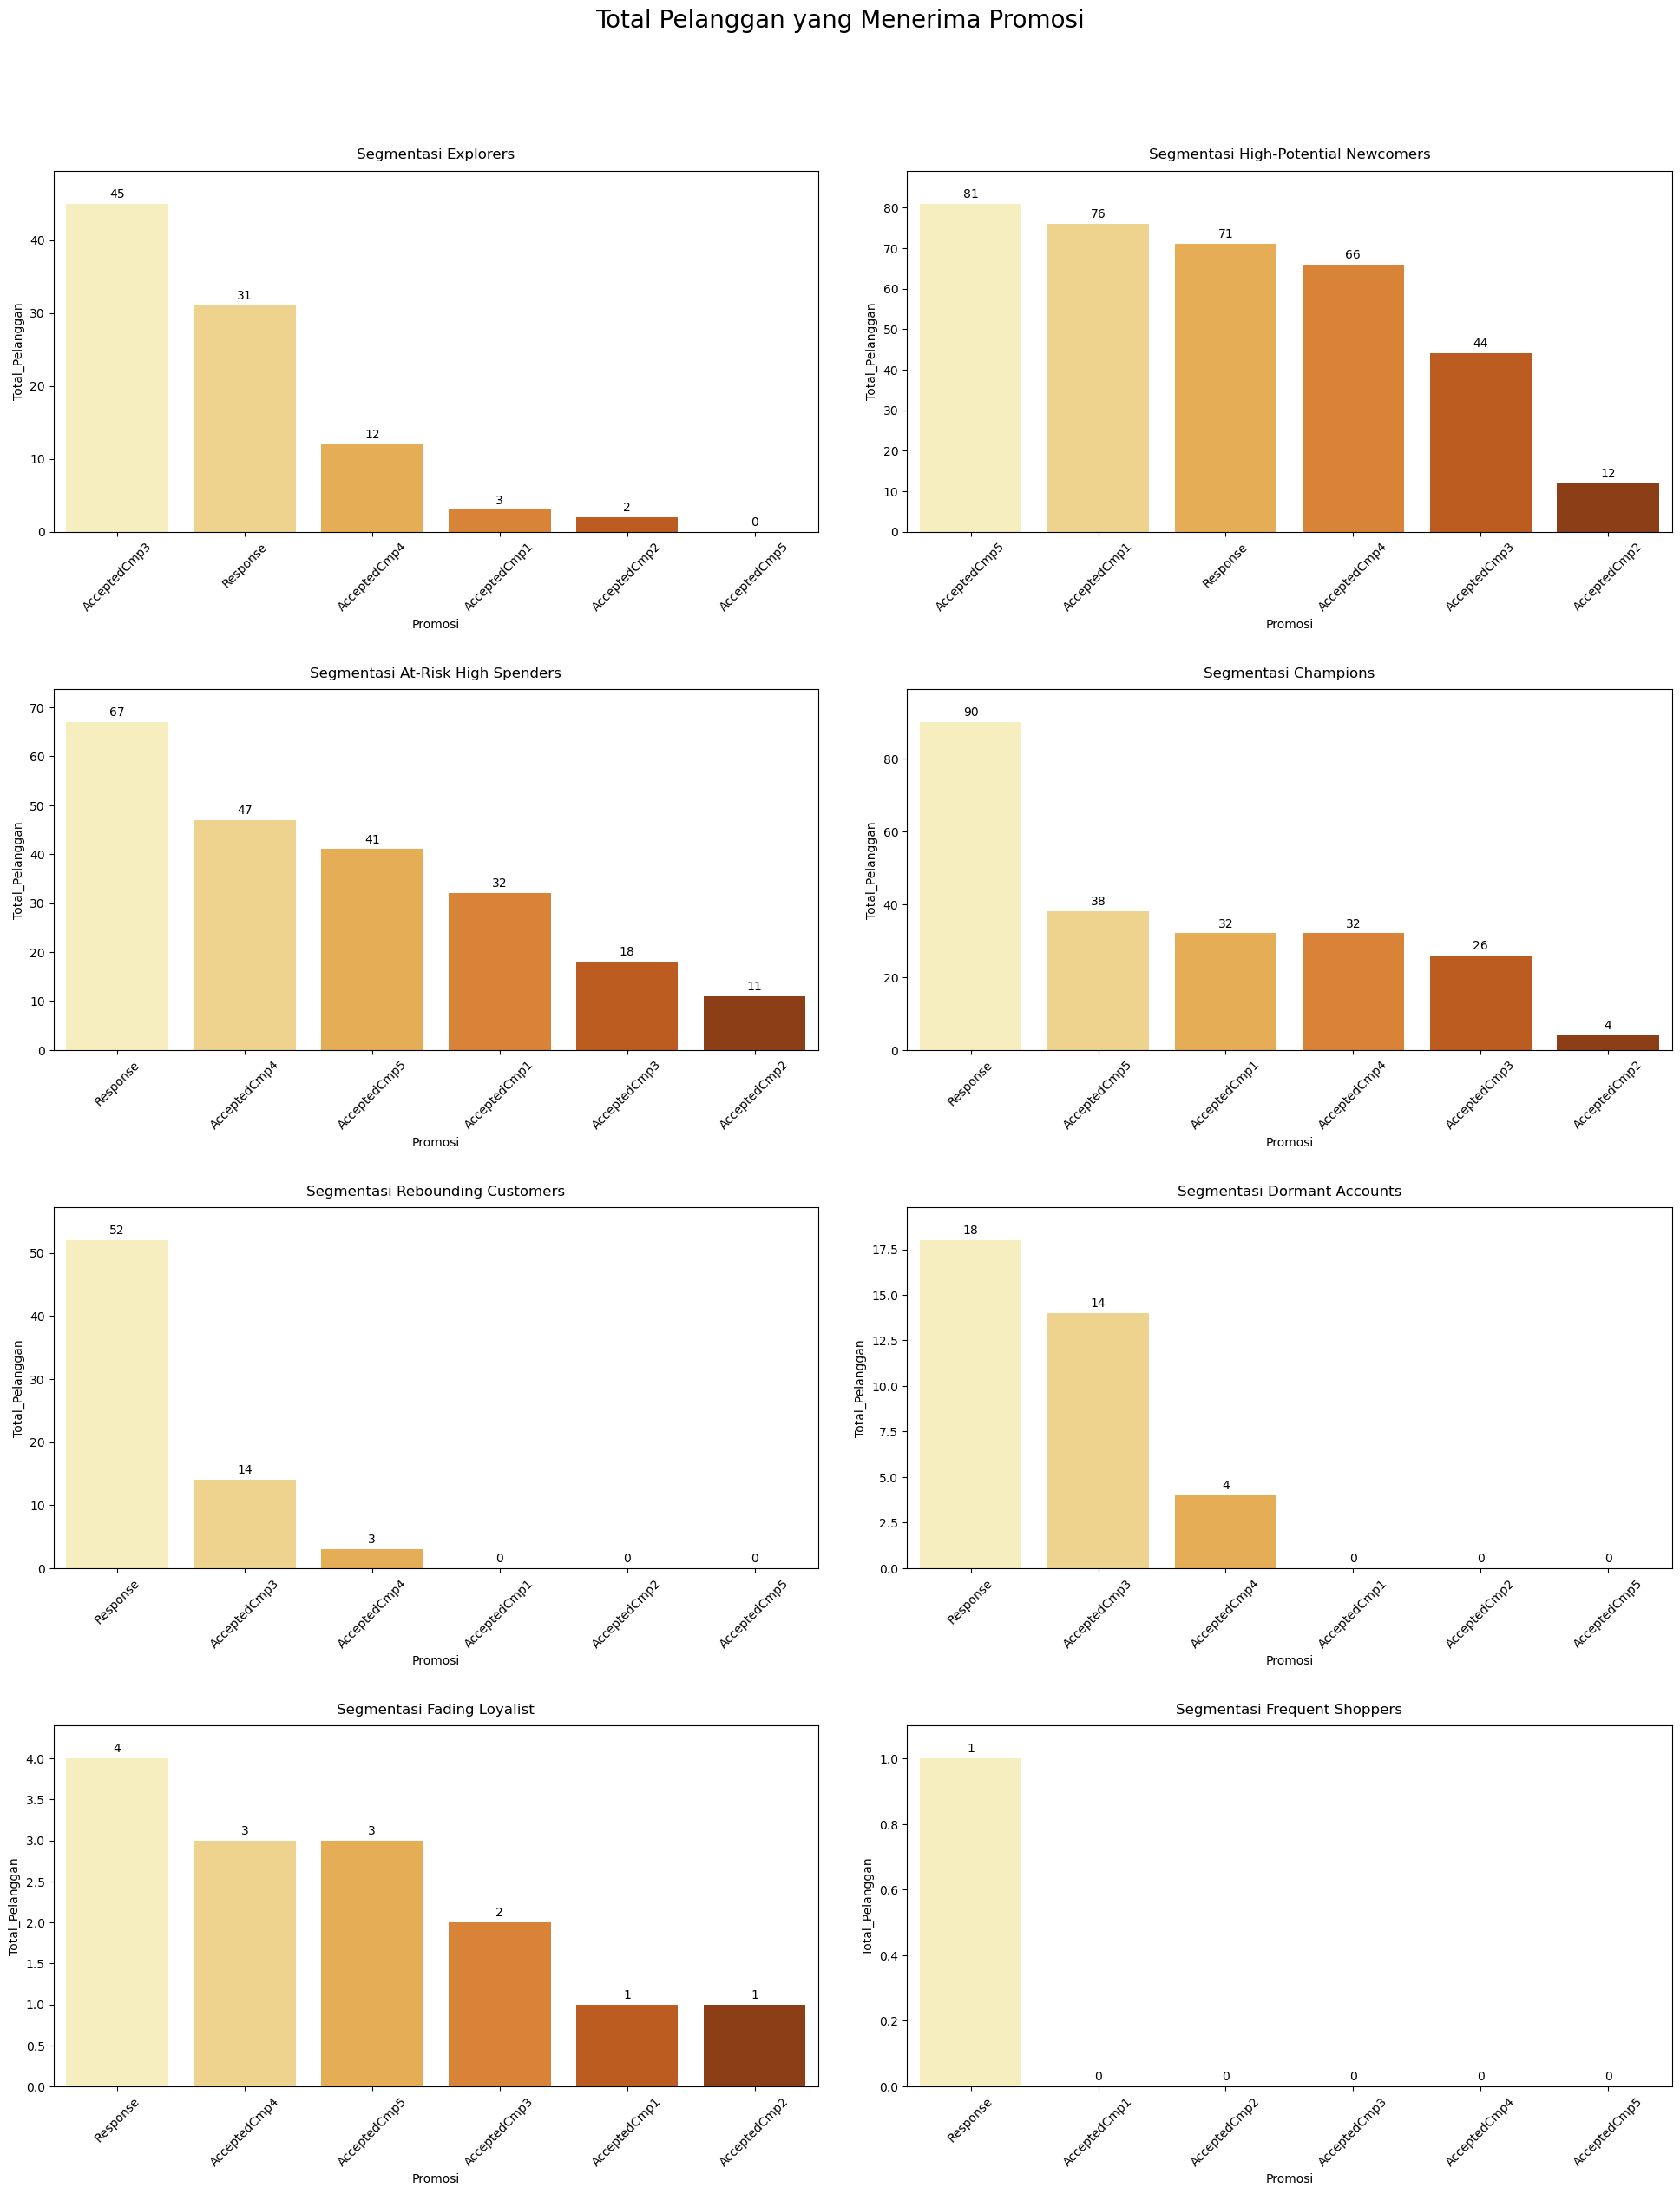

In [123]:
# Buat figure dan axes dengan grid 4x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))

# Atur judul utama
plt.suptitle('Total Pelanggan yang Menerima Promosi', size=20, y=1.02)

# Daftar data dan judul untuk setiap subplot
segment_data = [
    (cmp_counts1, 'Segmentasi Explorers'),
    (cmp_counts2, 'Segmentasi High-Potential Newcomers'),
    (cmp_counts3, 'Segmentasi At-Risk High Spenders'),
    (cmp_counts4, 'Segmentasi Champions'),
    (cmp_counts5, 'Segmentasi Rebounding Customers'),
    (cmp_counts6, 'Segmentasi Dormant Accounts'),
    (cmp_counts7, 'Segmentasi Fading Loyalist'),
    (cmp_counts8, 'Segmentasi Frequent Shoppers')
]

# Buat plot untuk setiap segmentasi
for i, (data, title) in enumerate(segment_data):
    row = i // 2  # 2 kolom per baris
    col = i % 2   # 0 atau 1
    ax = axes[row, col]
    
    sns.barplot(data=data, y='Total_Pelanggan', x='Promosi', palette='YlOrBr', ax=ax)
    ax.set_title(title, pad=10)
    ax.tick_params(axis='x', rotation=45)
    
    # Tambah label nilai di setiap bar
    for container in ax.containers:
        ax.bar_label(container, padding=3)
    
    # Atur margin
    ax.margins(y=0.1)

# Atur layout
plt.tight_layout(pad=3.0)  # Beri jarak ekstra antar subplot
plt.show()

Secara keseluruhan kampanye atau promosi yang berhasil adalah kampanye terakhir (response), namun untuk pelanggan segmentasi Explorers kampanye yang cocok adalah kampanye ke-3, sedangkan untuk High-Potential Newcomers lebih cocok kampanye 5.

## 6. Distribusi Komplain Pelanggan

In [124]:
df_clean.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Status,Child,Child_Status,Frequency,TotalPrice,length,frequency,monetary,lrfm_segmentasi
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,Dewasa,0,No,22,1617,664,22,1617,At-Risk High Spenders


In [125]:
# Hitung jumlah pelanggan yang komplain (nilai > 0)
cmpln_counts = (df_clean['Complain'] > 0).sum()
cmpln_counts

21

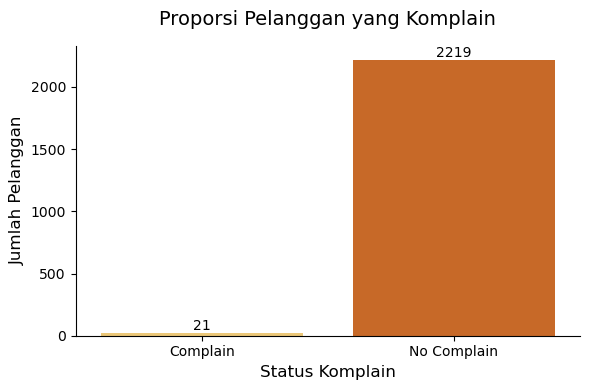

In [126]:
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x=['Complain', 'No Complain'],
    y=[cmpln_counts, len(df_clean) - cmpln_counts],
    palette='YlOrBr',  # Warna cokelat muda
    linewidth=1
)

# Anotasi
plt.title('Proporsi Pelanggan yang Komplain', fontsize=14, pad=15)
plt.xlabel('Status Komplain', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
sns.despine()

# Tambah nilai di atas bar
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

In [127]:
# Jumlah pelanggan per segmentasi berdasarkan complain
cmpln_segcus= df_clean.pivot_table(
    index=['lrfm_segmentasi'],
    columns=['Complain'],
    values='ID',
    aggfunc='count',
    fill_value=0
)
cmpln_segcus

Complain,0,1
lrfm_segmentasi,,
At-Risk High Spenders,318,3
Champions,282,2
Dormant Accounts,231,4
Explorers,623,6
Fading Loyalist,19,0
Frequent Shoppers,7,0
High-Potential Newcomers,488,3
Rebounding Customers,251,3


- Segmentasi dengan kepuasan tertinggi: `Explorers` dan `High-Potential Newcomers`
- Segmentasi bernilai tinggi yang puas: `At-Risk High Spenders` dan `Champions`
- Segmentasi yang membutuhkan perhatian khusus: `Dormant Accounts` dan `Fading Loyalist`
- Segmentasi unik: `Frequent Shoppers`

## Kesimpulan

Berdasarkan analisis yang dilakukan, dapat diambil kesimpulan:

1. Karakteristik segmentasi pelanggan supermarket
    + Mayoritas pelanggan berasal dari kelompok usia produktif (18-60 tahun) yang sudah menikah/berpasangan dan memiliki anak, dengan tingkat pendidikan tinggi (Graduation dan PhD).
    + Segmentasi terbesar adalah `Explorers` (pelanggan baru dengan nilai belanja rendah), menunjukkan potensi untuk dikonversi menjadi pelanggan bernilai lebih tinggi. 
    + Pelanggan bernilai tinggi, seperti `High-Potential Newcomers`, `Champions`, dan `At-Risk High Spenders` perlu dijaga retensinya karena memberikan kontribusi bernilai lebih tinggi.
    + Pelanggan yang berisiko churn, seperti `Dormant Accounts`, `Fading Loyalist`, `At-Risk High Spenders` memerlukan strategi reaktivasi.
    + `Frequent Shoppers` dan `Rebounding Customers` adalah segmen kecil tetapi berpotensi ditingkatkan nilai transaksinya.

2. Performa penjualan antar-segmen pelanggan, serta produk apa yang paling dominan pada masing-masing segmen

    + Produk Wines, Meat, dan Gold secara konsisten menjadi produk yang paling populer pada semua segmen.
    + Segmen `Champions`, `High-Potential`, dan `At-Risk High Spenders` bisa menjadi target utama promosi karena rata-rata penjualan dan total penjualan yang tinggi dan memiliki banyak pelanggan.
    


3. Pengaruh pemberian diskon terhadap monetary dan frequency pelanggan
- Statistik Signifikan
> Baik untuk monetary maupun frequency terdapat perbedaan signifikan antara pengguna dan bukan pengguna diskon.

- Pemberian diskon tidak meningkatkan total pengeluaran maupun frekuensi belanja pelanggan, bahkan pelanggan yang menggunakan diskon cenderung berbelanja dengan nilai lebih rendah dan frekuensi tinggi tidak terlalu tergantung pada diskon.

4. Distribusi jumlah pelanggan dan total penjualan melalui berbagai kanal (store, web, dan katalog)

- Store dan Web memiliki jumlah pelanggan yang hampir setara, tetapi store memberikan kontribusi penjualan lebih tinggi.
- Katalog adalah kanal dengan jumlah pelanggan dan total penjualan terendah


5. Efektifitas kampanye/promosi yang dilakukan

Secara keseluruhan kampanye atau promosi yang berhasil adalah kampanye terakhir (response), namun untuk pelanggan segmentasi Explorers kampanye yang cocok adalah kampanye ke-3, sedangkan untuk High-Potential Newcomers lebih cocok kampanye 5.

6. Distribusi komplain pelanggan

- Segmentasi dengan kepuasan tertinggi: `Explorers` dan `High-Potential Newcomers`
> Pengalaman pertama berhasil memenuhi ekspektasi
- Segmentasi bernilai tinggi yang puas: `At-Risk High Spenders` dan `Champions`
> Mayoritas pelanggan high spenders dan pelanggan loyal puas
- Segmentasi yang membutuhkan perhatian khusus: `Dormant Accounts` dan `Fading Loyalist`
> Kepuasan tidak menjamin keterlibatan, mungkin beralih ke kompetitor lain
- Segmentasi unik: `Frequent Shoppers`
> Meski jumlahnya kecil namun sangat loyal dan puas. Berpotensi untuk dikembangkan menjadi segmentasi Champions

## Rekomendasi

1. Karakteristik segmentasi pelanggan supermarket
- `Explorers`:
    + Berikan diskon pertama atau cashback untuk meningkatkan frekuensi belanja.
    + Rekomendasikan produk bernilai lebih tinggi berdasarkan riwayat belanja.
- `High-Potential Newcomers`:
    + Tawarkan program loyalitas eksklusif (membership, poin belanja) untuk mempertahankan engagement.
    + Berikan bundling produk premium untuk meningkat nilai transaksi.
- `Champions`:
    + Berikan reward eksklusif (early access sale, free shipping) untuk mempertahankan loyalitas.
    + Ajak mereka menjadi brand ambassador (referral program).
- `At-Risk High Spenders` & `Fading Loyalist`:
    + Kirim personalized email/call dengan penawaran spesial berdasarkan minat sebelumnya.
    + Beri insentif comeback, seperti "Kembali belanja dalam 30 hari dapatkan double poin"
- `Dormant Accouunts`:
    + Lakukan kampanye diskon "kembali lagi" atau survei kepuasaan.
    + Gunakan retargeting ads di platform media sosial untuk mengingatkan produk baru/promo.
- `Frequent Shoppers`:
    + Tawarkan produk dengan nilai lebih tinggi dengan bundling produk.
- `Rebounding Customers`:
    + Berikan insentif tambahan (double poin, gratis sample) untuk mempertahankan keterlibatan.
-  Secara keseluruhan, untuk semua segmentasi kembangkan kampanye keluarga (bundling produk keluarga atau promo weekend untuk keluarga). Buat konten edukasi (blog/video) tentang produk untuk kebutuhan dewasa berpendidikan tinggi.

2. Performa penjualan antar-segmen pelanggan, serta produk apa yang paling dominan pada masing-masing segmen
    + Berikan diskon eksklusif atau bundling untuk produk Wines, Meat, dan Gold.
        - Paket "Premium Wine + Gourmet Meat" dengan harga spesial.
        - Voucher belanja untuk pembelian Gold di atas nominal tertentu.
    + Untuk meningkatkan penjualan produk kurang populer:
        - Bundling dengan produk populer
        Contoh: 
            + Beli Wine + Dapatkan Fish Fillet 50% off
            + Beli Gold, dapatkan Free Bowl of Fruits
            + Paket Healthy Lifestyle (Fruits + Fish, Meat + Fruits, Fruits + Sweet Organic)
        - Fokus pada hari raya/momen spesial untuk mempromosikan produk Sweet.
        - Berikan sampel gratis
        - Tempatkan produk kurang laris di area strategis
    + Survei pelanggan untuk menanyakan pendapat mereka tentang produk yang kurang populer.


    

3. Pengaruh pemberian diskon terhadap monetary dan frequency pelanggan

- Alihkan sebagian insentif diskon ke program loyalitas, seperti poin, cashback, atau exclusive benefits, untuk mendorong repeat order tanpa mengurangi profit margin.
- Hindari memberikan diskon besar pada produk yang sudah laris, tetapi gunakan diskon selektif untuk produk kurang laris atau produk yang marginnya tinggi.
- Minimum spending untuk dapatkan diskon atau semakin besar belanja semakin besar diskon untuk meningkatkan monetary.



4. Distribusi jumlah pelanggan dan total penjualan melalui berbagai kanal (store, web, dan katalog)

- Optimalisasi Kanal Store
    + Terapkan upselling
    + Sediakan produk demo
    + Dorong pelanggan web untuk pickup di store dengan diskon tambahan atau free gift.
- Kanal Web
    + Optimalkan loading speed, mobile-friendly, dan proses checkout 1-click, dan tambahkan live chat untuk bantuan real time.
    + Email marketing dan Retargeting ads
    + Berikan voucher khusus web dan flash sale/limited-time deals untuk dorong impulse buying.
- Kanal Katalog
    + Ubah katalog menjadi e-katalog interaktif dan integrasi dengan kode QR di store/web untuk akses cepat.
    + Sertakan kode promo khusus katalog. 
    

5. Efektifitas kampanye/promosi yang dilakukan

- Analisis lebih dalam mengapa kampanye terkahir yang dilakukan berhasil, seperti apakah karena diskon besar, waktu pengiriman, atau kreatifnya.
- Tingkatkan personalisasi dan timing untuk meningkatkan interaksi pelanggan dengan promosi. 

6. Distribusi komplain pelanggan

- Kirim survey kepuasan untuk memastikan ekspektasi terpenuhi serta berikan reward untuk yang mengisi survey dan membagikan pengalaman positif.
- Respon komplain secara cepat dan berikan solusi secara tuntas, serta follow-up pelanggan yang melakukan komplain.
- Berikan tracking number untuk komplain.


---